In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
!gdown --id 1dTE9xqu5Sae3FIa8TIWJyvQ6FOv_HrRz
!gdown --id 1hALkGO30T6V5mx1CjSAmp-UsK5WS-YAO

train=pd.read_csv('public-train.csv',delimiter='|')
test=pd.read_csv('public-test.csv',delimiter='|')

Downloading...
From: https://drive.google.com/uc?id=1dTE9xqu5Sae3FIa8TIWJyvQ6FOv_HrRz
To: /content/public-test.csv
100% 682k/682k [00:00<00:00, 56.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1hALkGO30T6V5mx1CjSAmp-UsK5WS-YAO
To: /content/public-train.csv
4.65MB [00:00, 72.3MB/s]


In [ ]:
import seaborn as sns

##Check duls 

note ngubah laxile karena laxile harusnya gak ada huruf depannya coba cari di google

In [ ]:
# unique di columns lexile_measure 
#  [nan 'HL740L' '760L' '880L' '710L' '930' 'HL720L' '690' 'HL590L' 'HL700L'
#  '990L' 'AD460L' '740L' '950L' '770L' '790L' 'HL750L' 'GN370L' '860L'
#  'GN400L' '730L' 'AD300L' '850L' '1170L' '930L' 'AD510L' 'HL710L' 'AD380L'
#  'HL780L' 'NP' '570L' '690L' '980L' 'HL730L' 'AD600L' '640L' '230L' '130L'
#  '800L' '840L' 'HL600L' '970' '940L' 'AD490L' '920L' 'HL580L' '1010L'
#  '630L' 'HL680L' 'HL790L' '710' 'AD450L' '960L' '360L' '1100L' 'AD650L'
#  'AD550L' 'AD660L' '720L' '670'] 
 

# unique di columns grade_level 
#  [nan '9 - 12' '3 - 7' '7 - 9' '10 - 12' '10 and up'
#  'Preschool - Kindergarten' '7 - 12' '5 - 6' 'Kindergarten - 3' '6 - 9'
#  '5 - 9' '4 - 7' 'Preschool - 1' 'Preschool - 3' '8 - 12' '8 - 9'
#  '8 and up' '9 and up' '1 - 2' 'Preschool - 2' '4 - 6' '7 and up' '5 - 8'
#  '5 - 7'] 

 
# unique di columns reading_age 
#  [nan '14 years and up' '8 - 12 years' '12 - 17 years' '13 - 17 years'
#  '15 years and up' '12 - 15 years' '18 years and up' '13 years and up'
#  '3 - 5 years' '12 - 18 years' '4 - 8 years' '10 - 13 years' '5 - 8 years'
#  '11 years and up' '10 - 14 years' '14 - 17 years' '12 years and up'
#  '9 - 12 years' '4 - 6 years' '10 years' '2 - 5 years' '6 - 11 years'
#  '3 - 6 years' '4 - 7 years' '10 years and up' '8 - 11 years'
#  '13 - 18 years' '16 years and up' '3 - 8 years' '3 - 7 years'
#  '10 - 12 years'] 

In [ ]:
eksplor=train[["description",'reading_age','lexile_measure','grade_level']]
eksplor[eksplor.grade_level=='Preschool - Kindergarten']

,description,reading_age,lexile_measure,grade_level
332,Gerald is careful. Piggie is not.Piggie cannot...,3 - 5 years,NaN,Preschool - Kindergarten
998,"Much to the chagrin of Pigeon, little Duckling...",3 - 5 years,AD300L,Preschool - Kindergarten


In [ ]:
train.head(10)

,author_id,description,bookformat,bookedition,pages,published_date,publisher_id,reading_age,lexile_measure,grade_level,weight,rating_value_0,rating_value_1,rating_count_0,rating_count_1,dimension_0,dimension_1,dimension_2,genre_0,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7,genre_8,genre_9,genre_0_weight,genre_1_weight,genre_2_weight,genre_3_weight,genre_4_weight,genre_5_weight,genre_6_weight,genre_7_weight,genre_8_weight,genre_9_weight,price
0,author2106,"Just after the Second World War, in the small ...",Hardcover,NaN,309.0,NaN,NaN,NaN,NaN,NaN,NaN,3.76,NaN,26625,1,NaN,NaN,NaN,Historical Fiction,Fiction,Historical,Audiobook,Romance,Books About Books,Adult,Adult Fiction,British Literature,Chick Lit,0.45,0.22,0.08,0.06,0.05,0.04,0.03,0.02,0.02,0.02,NaN
1,author1018,"Blame it on Hawaii’s rainbows, sparkling beach...",Paperback,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.48,NaN,21,1,NaN,NaN,NaN,Memoir,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,author1087,"The Pulitzer Prize–winning, bestselling author...",Hardcover,NaN,496.0,NaN,NaN,NaN,NaN,NaN,NaN,4.56,NaN,59885,1,NaN,NaN,NaN,Nonfiction,History,Politics,Race,Social Justice,Audiobook,Sociology,Anti Racist,American History,African American,0.42,0.22,0.08,0.08,0.05,0.05,0.04,0.02,0.02,0.02,NaN
3,author1295,THINGS ARE ABOUT TO GET SERIOUS FOR HARRY DRES...,Hardcover,First Edition,418.0,NaN,NaN,NaN,NaN,NaN,NaN,4.39,NaN,26643,1,NaN,NaN,NaN,Fantasy,Urban Fantasy,Fiction,Magic,Paranormal,Audiobook,Vampires,Mystery,Supernatural,Fae,0.41,0.30,0.08,0.05,0.04,0.04,0.03,0.02,0.02,0.02,NaN
4,author2622,The Romanovs were the most successful dynasty ...,Hardcover,NaN,784.0,NaN,NaN,NaN,NaN,NaN,NaN,3.93,NaN,11772,1,NaN,NaN,NaN,History,Nonfiction,Russia,Biography,Historical,Russian History,Audiobook,Politics,European History,Romanovs,0.42,0.30,0.09,0.08,0.04,0.02,0.01,0.01,0.01,0.01,NaN
5,author2076,Shocked by a five-month arson spree that left ...,Hardcover,NaN,255.0,NaN,NaN,NaN,NaN,NaN,NaN,3.79,NaN,13653,1,NaN,NaN,NaN,Nonfiction,True Crime,Crime,Audiobook,History,Mystery,Adult,Journalism,Sociology,Biography,0.45,0.31,0.07,0.04,0.04,0.03,0.02,0.01,0.01,0.01,NaN
6,author1914,"In a society steeped in tradition, Princess Li...",Kindle Edition,NaN,492.0,NaN,NaN,NaN,NaN,NaN,NaN,3.97,NaN,100409,1,NaN,NaN,NaN,Fantasy,Young Adult,Romance,Young Adult Fantasy,Fiction,High Fantasy,Adventure,Magic,Audiobook,Dystopia,0.47,0.21,0.14,0.05,0.03,0.03,0.02,0.02,0.01,0.01,NaN
7,author1818,Madeleine Thien's new novel is breathtaking in...,Hardcover,NaN,473.0,NaN,NaN,NaN,NaN,NaN,NaN,3.91,NaN,18525,1,NaN,NaN,NaN,Fiction,Historical Fiction,China,Canada,Historical,Asia,Literary Fiction,Contemporary,Music,Novels,0.32,0.30,0.10,0.06,0.05,0.04,0.04,0.03,0.02,0.02,NaN
8,author1478,New York Times bestselling author Karin Slaugh...,Hardcover,NaN,446.0,NaN,NaN,NaN,NaN,NaN,NaN,4.07,NaN,34994,1,NaN,NaN,NaN,Thriller,Mystery,Fiction,Crime,Mystery Thriller,Audiobook,Suspense,Adult,Contemporary,Adult Fiction,0.24,0.21,0.16,0.10,0.09,0.07,0.07,0.03,0.02,0.01,NaN
9,author0932,"At long last, New York Times bestselling autho...",Mass Market Paperback,NaN,504.0,"February 28, 2012",publisher149,NaN,NaN,NaN,3628.74,4.29,4.6,26983,504,10.72,3.3,16.79,Paranormal Romance,Paranormal,Romance,Demons,Fantasy,Angels,Mythology,Adult,Urban Fantasy,Supernatural,0.26,0.21,0.17,0.10,0.08,0.05,0.04,0.04,0.03,0.02,98172.0


In [ ]:
train.sample(30)

,author_id,description,bookformat,bookedition,pages,published_date,publisher_id,reading_age,lexile_measure,grade_level,weight,rating_value_0,rating_value_1,rating_count_0,rating_count_1,dimension_0,dimension_1,dimension_2,genre_0,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7,genre_8,genre_9,genre_0_weight,genre_1_weight,genre_2_weight,genre_3_weight,genre_4_weight,genre_5_weight,genre_6_weight,genre_7_weight,genre_8_weight,genre_9_weight,price
3007,author2108,"Thought-provoking and sardonically expressive,...",Paperback,NaN,96.0,NaN,NaN,NaN,NaN,NaN,NaN,4.18,NaN,307,1,NaN,NaN,NaN,Poetry,Female Authors,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.99,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2140,author0491,Ifemelu and Obinze are young and in love when ...,Hardcover,NaN,477.0,NaN,NaN,NaN,NaN,NaN,NaN,4.31,NaN,293963,1,NaN,NaN,NaN,Fiction,Africa,Contemporary,Feminism,Literary Fiction,Race,Nigeria,Novels,Romance,Audiobook,0.49,0.11,0.09,0.06,0.05,0.05,0.04,0.04,0.03,0.03,NaN
870,author1311,Faerie is still dying.Only I can pose as queen...,Paperback,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2124,author1829,"Malcolm Gladwell, host of the podcast Revision...",Hardcover,NaN,388.0,NaN,NaN,NaN,NaN,NaN,NaN,4.02,NaN,177370,1,NaN,NaN,NaN,Nonfiction,Psychology,Audiobook,Self Help,Sociology,Science,Business,Personal Development,Communication,Adult,0.50,0.17,0.11,0.06,0.05,0.04,0.03,0.02,0.01,0.01,NaN
1333,author2527,From the New York Times bestselling author of ...,Hardcover,NaN,296.0,NaN,NaN,NaN,NaN,NaN,NaN,3.97,NaN,31454,1,NaN,NaN,NaN,Fiction,Magical Realism,Fantasy,Romance,Chick Lit,Contemporary,Magic,Adult,Adult Fiction,Southern,0.24,0.24,0.14,0.09,0.09,0.06,0.05,0.03,0.03,0.02,NaN
227,author1267,The star of Julián Is a Mermaid makes a joyful...,Hardcover,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,4.20,NaN,1140,1,NaN,NaN,NaN,Picture Books,LGBT,Childrens,Family,Queer,Love,Fiction,Realistic Fiction,Art,Gender,0.51,0.20,0.12,0.03,0.03,0.03,0.03,0.02,0.02,0.02,NaN
1488,author1390,The prizewinning author of Founding Brothers ...,Hardcover,NaN,320.0,NaN,NaN,NaN,NaN,NaN,NaN,4.13,NaN,5257,1,NaN,NaN,NaN,History,Nonfiction,American History,Biography,Politics,American Revolution,Historical,Audiobook,American,American Revolutionary War,0.49,0.17,0.12,0.06,0.06,0.04,0.02,0.01,0.01,0.01,NaN
1557,author0525,The ultimate secret. The ultimate agent. Natha...,Hardcover,NaN,337.0,NaN,NaN,NaN,NaN,NaN,NaN,4.01,NaN,5114,1,NaN,NaN,NaN,Vampires,Urban Fantasy,Horror,Fantasy,Paranormal,Fiction,Thriller,Supernatural,Suspense,Audiobook,0.18,0.16,0.16,0.12,0.09,0.09,0.09,0.05,0.03,0.03,NaN
2842,author2460,An Apocalypse. An epic change in biology. Huma...,Paperback,1,650.0,NaN,NaN,NaN,NaN,NaN,NaN,5.00,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2462,author1375,All Hail God Money!From Jonathan Hickman (East...,Paperback,Trade,240.0,NaN,NaN,NaN,NaN,NaN,NaN,4.14,NaN,2766,1,NaN,NaN,NaN,Comics,Graphic Novels,Horror,Fantasy,Mystery,Fiction,Graphic Novels Comics,Crime,Comic Book,Thriller,0.32,0.29,0.14,0.06,0.05,0.04,0.04,0.03,0.03,0.01,NaN


In [ ]:
train.shape

(3550, 39)

##check null.. eh kok ada price yg kosong 

In [ ]:
train.isna().sum()

author_id           10
description         38
bookformat          13
bookedition       3319
pages               99
published_date    2982
publisher_id      2982
reading_age       3424
lexile_measure    3462
grade_level       3450
weight            3031
rating_value_0      10
rating_value_1    2997
rating_count_0       0
rating_count_1       0
dimension_0       3038
dimension_1       3038
dimension_2       3051
genre_0            150
genre_1            197
genre_2            228
genre_3            248
genre_4            280
genre_5            310
genre_6            338
genre_7            378
genre_8            414
genre_9            450
genre_0_weight     150
genre_1_weight     197
genre_2_weight     228
genre_3_weight     248
genre_4_weight     280
genre_5_weight     310
genre_6_weight     338
genre_7_weight     378
genre_8_weight     414
genre_9_weight     450
price             3007
dtype: int64

##hapus deh price yang kosong. mau dimanfaatin gimana labelnya kosong gitu

In [ ]:
# train=train.dropna(axis=0,subset=['price'])
# train.shape

##check info duls

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3550 entries, 0 to 3549
Data columns (total 39 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   author_id       3540 non-null   object 
 1   description     3512 non-null   object 
 2   bookformat      3537 non-null   object 
 3   bookedition     231 non-null    object 
 4   pages           3451 non-null   float64
 5   published_date  568 non-null    object 
 6   publisher_id    568 non-null    object 
 7   reading_age     126 non-null    object 
 8   lexile_measure  88 non-null     object 
 9   grade_level     100 non-null    object 
 10  weight          519 non-null    float64
 11  rating_value_0  3540 non-null   float64
 12  rating_value_1  553 non-null    float64
 13  rating_count_0  3550 non-null   int64  
 14  rating_count_1  3550 non-null   int64  
 15  dimension_0     512 non-null    float64
 16  dimension_1     512 non-null    float64
 17  dimension_2     499 non-null    f

## check unique liat2 aja kan

In [ ]:
for x in train.columns:
  print(f'unique di columns {x} \n {train[x].unique()} \n \n')

unique di columns author_id 
 ['author2106' 'author1018' 'author1087' ... 'author1288' 'author1816'
 'author0882'] 
 

unique di columns description 
 ["Just after the Second World War, in the small English village of Chawton, an unusual but like-minded group of people band together to attempt something remarkable.One hundred and fifty years ago, Chawton was the final home of Jane Austen, one of England's finest novelists. Now it's home to a few distant relatives and their diminishing estate. With the last bit of Austen's legacy threatened, a group of disparate individuals come together to preserve both Jane Austen's home and her legacy. These people—a laborer, a young widow, the local doctor, and a movie star, among others—could not be more different and yet they are united in their love for the works and words of Austen. As each of them endures their own quiet struggle with loss and trauma, some from the recent war, others from more distant tragedies, they rally together to create th

## Check korelasi

In [ ]:
train.corr().style.background_gradient().set_precision(2)

,pages,weight,rating_value_0,rating_value_1,rating_count_0,rating_count_1,dimension_0,dimension_1,dimension_2,genre_0_weight,genre_1_weight,genre_2_weight,genre_3_weight,genre_4_weight,genre_5_weight,genre_6_weight,genre_7_weight,genre_8_weight,genre_9_weight,price
pages,1.00,-0.39,0.07,-0.08,0.12,0.10,-0.19,0.22,0.03,-0.19,0.10,0.07,0.07,0.06,0.09,0.10,0.09,0.09,0.09,0.24
weight,-0.39,1.00,0.04,0.09,-0.09,-0.13,-0.07,-0.17,-0.20,0.03,-0.01,-0.02,-0.02,-0.03,-0.02,-0.02,-0.00,0.01,-0.04,-0.23
rating_value_0,0.07,0.04,1.00,0.31,0.04,0.01,0.05,-0.11,-0.06,0.03,-0.10,-0.04,0.03,0.04,0.02,0.01,-0.02,-0.03,-0.02,0.05
rating_value_1,-0.08,0.09,0.31,1.00,0.02,-0.01,0.08,-0.05,-0.09,0.05,-0.10,0.02,0.15,0.12,0.09,0.02,-0.00,-0.05,-0.05,-0.17
rating_count_0,0.12,-0.09,0.04,0.02,1.00,0.24,0.04,0.09,-0.17,-0.09,0.04,0.04,0.03,0.03,0.03,0.03,0.05,0.05,0.05,0.01
rating_count_1,0.10,-0.13,0.01,-0.01,0.24,1.00,0.02,0.03,0.01,-0.05,0.01,0.00,0.03,0.04,0.05,0.01,0.03,0.00,0.02,0.01
dimension_0,-0.19,-0.07,0.05,0.08,0.04,0.02,1.00,-0.18,0.24,0.10,-0.11,-0.06,-0.05,-0.06,-0.10,-0.20,-0.22,-0.27,-0.25,0.05
dimension_1,0.22,-0.17,-0.11,-0.05,0.09,0.03,-0.18,1.00,-0.40,-0.11,0.08,0.06,0.09,0.06,0.02,0.03,0.06,0.09,0.09,0.14
dimension_2,0.03,-0.20,-0.06,-0.09,-0.17,0.01,0.24,-0.40,1.00,0.05,-0.05,-0.01,-0.07,-0.12,-0.12,-0.16,-0.16,-0.17,-0.14,0.16
genre_0_weight,-0.19,0.03,0.03,0.05,-0.09,-0.05,0.10,-0.11,0.05,1.00,-0.58,-0.70,-0.68,-0.68,-0.65,-0.59,-0.53,-0.49,-0.44,-0.04


##bagian ngubah2 ke angka 

In [ ]:

train['author_id'] = train['author_id'].astype('category')
train['publisher_id'] = train['publisher_id'].astype('category')
train['bookformat'] = train['bookformat'].astype('category')
train['bookedition'] = train['bookedition'].astype('category')


train['author_id']=train['author_id'].cat.codes
train['publisher_id']=train['publisher_id'].cat.codes
train['bookformat']=train['bookformat'].cat.codes
train['bookedition']=train['bookedition'].cat.codes

train

,author_id,description,bookformat,bookedition,pages,published_date,publisher_id,reading_age,lexile_measure,grade_level,weight,rating_value_0,rating_value_1,rating_count_0,rating_count_1,dimension_0,dimension_1,dimension_2,genre_0,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7,genre_8,genre_9,genre_0_weight,genre_1_weight,genre_2_weight,genre_3_weight,genre_4_weight,genre_5_weight,genre_6_weight,genre_7_weight,genre_8_weight,genre_9_weight,price
0,1718,"Just after the Second World War, in the small ...",2,-1,309.0,NaN,-1,NaN,NaN,NaN,NaN,3.76,NaN,26625,1,NaN,NaN,NaN,Historical Fiction,Fiction,Historical,Audiobook,Romance,Books About Books,Adult,Adult Fiction,British Literature,Chick Lit,0.45,0.22,0.08,0.06,0.05,0.04,0.03,0.02,0.02,0.02,NaN
1,817,"Blame it on Hawaii’s rainbows, sparkling beach...",7,-1,NaN,NaN,-1,NaN,NaN,NaN,NaN,4.48,NaN,21,1,NaN,NaN,NaN,Memoir,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,878,"The Pulitzer Prize–winning, bestselling author...",2,-1,496.0,NaN,-1,NaN,NaN,NaN,NaN,4.56,NaN,59885,1,NaN,NaN,NaN,Nonfiction,History,Politics,Race,Social Justice,Audiobook,Sociology,Anti Racist,American History,African American,0.42,0.22,0.08,0.08,0.05,0.05,0.04,0.02,0.02,0.02,NaN
3,1049,THINGS ARE ABOUT TO GET SERIOUS FOR HARRY DRES...,2,26,418.0,NaN,-1,NaN,NaN,NaN,NaN,4.39,NaN,26643,1,NaN,NaN,NaN,Fantasy,Urban Fantasy,Fiction,Magic,Paranormal,Audiobook,Vampires,Mystery,Supernatural,Fae,0.41,0.30,0.08,0.05,0.04,0.04,0.03,0.02,0.02,0.02,NaN
4,2141,The Romanovs were the most successful dynasty ...,2,-1,784.0,NaN,-1,NaN,NaN,NaN,NaN,3.93,NaN,11772,1,NaN,NaN,NaN,History,Nonfiction,Russia,Biography,Historical,Russian History,Audiobook,Politics,European History,Romanovs,0.42,0.30,0.09,0.08,0.04,0.02,0.01,0.01,0.01,0.01,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3545,925,How much is too much to love? Travis Maddox le...,7,53,448.0,NaN,-1,NaN,NaN,NaN,NaN,4.19,NaN,172198,1,NaN,NaN,NaN,Romance,New Adult,Contemporary,Young Adult,Contemporary Romance,College,Fiction,Chick Lit,Fighters,Love,0.36,0.24,0.10,0.07,0.07,0.06,0.03,0.02,0.02,0.02,NaN
3546,2338,Magneto and Professor X. Superman and Lex Luth...,2,-1,478.0,NaN,-1,NaN,NaN,NaN,NaN,4.21,NaN,43149,1,NaN,NaN,NaN,Fantasy,Science Fiction,Adult,Fiction,Urban Fantasy,Paranormal,Superheroes,Audiobook,Adult Fiction,Young Adult,0.43,0.18,0.11,0.11,0.04,0.04,0.03,0.02,0.02,0.02,NaN
3547,1059,Following the launch of her #1 New York Times ...,2,26,352.0,NaN,-1,NaN,NaN,NaN,NaN,3.55,NaN,5811,1,NaN,NaN,NaN,Cookbooks,Cooking,Nonfiction,Food,Foodie,NaN,NaN,NaN,NaN,NaN,0.68,0.14,0.13,0.05,0.01,NaN,NaN,NaN,NaN,NaN,NaN
3548,1482,"Bachelors, beware. For those who keep secrets ...",3,-1,NaN,NaN,-1,NaN,NaN,NaN,NaN,4.64,NaN,14,1,NaN,NaN,NaN,Historical Romance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##oke aku buat categorical dulu sih genre

In [ ]:
#make dic
res=pd.Series()
for genre in train.columns[18:28]:
    res=res.append(train[genre])

res=pd.Series(res.unique())
dicGenre=res.to_dict()
dicGenre = dict((v,k) for k,v in dicGenre.items())
dicGenre[np.nan]=999
dicGenre



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


{'12th Century': 343,
 '16th Century': 437,
 '17th Century': 467,
 '18th Century': 374,
 '19th Century': 345,
 '1st Grade': 418,
 '20th Century': 351,
 '21st Century': 215,
 'Abuse': 183,
 'Academic': 508,
 'Action': 255,
 'Activism': 318,
 'Adoption': 190,
 'Adult': 101,
 'Adult Fiction': 58,
 'Adventure': 53,
 'Aeroplanes': 385,
 'Africa': 126,
 'African American': 115,
 'African American Literature': 400,
 'African Literature': 369,
 'Agriculture': 258,
 'Aliens': 154,
 'Alternate History': 191,
 'Amazon': 253,
 'American': 139,
 'American Civil War': 397,
 'American History': 145,
 'American Revolution': 229,
 'American Revolutionary War': 352,
 'Ancient History': 189,
 'Angels': 196,
 'Animals': 83,
 'Anthologies': 207,
 'Anthropology': 160,
 'Anti Racist': 177,
 'Apocalyptic': 309,
 'Apple': 417,
 'Archaeology': 357,
 'Architecture': 395,
 'Art': 118,
 'Art Design': 466,
 'Art History': 496,
 'Art and Photography': 406,
 'Artificial Intelligence': 268,
 'Asexual': 473,
 'Asia': 1

In [ ]:
#subtitue dic
for genre in train.columns[18:28]:
    train[genre]=train[genre].replace(dicGenre)

train

,author_id,description,bookformat,bookedition,pages,published_date,publisher_id,reading_age,lexile_measure,grade_level,weight,rating_value_0,rating_value_1,rating_count_0,rating_count_1,dimension_0,dimension_1,dimension_2,genre_0,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7,genre_8,genre_9,genre_0_weight,genre_1_weight,genre_2_weight,genre_3_weight,genre_4_weight,genre_5_weight,genre_6_weight,genre_7_weight,genre_8_weight,genre_9_weight,price
0,1718,"Just after the Second World War, in the small ...",2,-1,309.0,NaN,-1,NaN,NaN,NaN,NaN,3.76,NaN,26625,1,NaN,NaN,NaN,0,5,89,92,19,159,101,58,251,31,0.45,0.22,0.08,0.06,0.05,0.04,0.03,0.02,0.02,0.02,NaN
1,817,"Blame it on Hawaii’s rainbows, sparkling beach...",7,-1,NaN,NaN,-1,NaN,NaN,NaN,NaN,4.48,NaN,21,1,NaN,NaN,NaN,1,999,999,999,999,999,999,999,999,999,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,878,"The Pulitzer Prize–winning, bestselling author...",2,-1,496.0,NaN,-1,NaN,NaN,NaN,NaN,4.56,NaN,59885,1,NaN,NaN,NaN,2,4,52,93,208,92,109,177,145,115,0.42,0.22,0.08,0.08,0.05,0.05,0.04,0.02,0.02,0.02,NaN
3,1049,THINGS ARE ABOUT TO GET SERIOUS FOR HARRY DRES...,2,26,418.0,NaN,-1,NaN,NaN,NaN,NaN,4.39,NaN,26643,1,NaN,NaN,NaN,3,11,5,82,27,92,56,15,296,54,0.41,0.30,0.08,0.05,0.04,0.04,0.03,0.02,0.02,0.02,NaN
4,2141,The Romanovs were the most successful dynasty ...,2,-1,784.0,NaN,-1,NaN,NaN,NaN,NaN,3.93,NaN,11772,1,NaN,NaN,NaN,4,2,135,32,89,334,92,52,388,452,0.42,0.30,0.09,0.08,0.04,0.02,0.01,0.01,0.01,0.01,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3545,925,How much is too much to love? Travis Maddox le...,7,53,448.0,NaN,-1,NaN,NaN,NaN,NaN,4.19,NaN,172198,1,NaN,NaN,NaN,19,57,29,10,77,244,5,31,329,201,0.36,0.24,0.10,0.07,0.07,0.06,0.03,0.02,0.02,0.02,NaN
3546,2338,Magneto and Professor X. Superman and Lex Luth...,2,-1,478.0,NaN,-1,NaN,NaN,NaN,NaN,4.21,NaN,43149,1,NaN,NaN,NaN,3,24,101,5,11,27,194,92,58,10,0.43,0.18,0.11,0.11,0.04,0.04,0.03,0.02,0.02,0.02,NaN
3547,1059,Following the launch of her #1 New York Times ...,2,26,352.0,NaN,-1,NaN,NaN,NaN,NaN,3.55,NaN,5811,1,NaN,NaN,NaN,8,81,2,26,256,999,999,999,999,999,0.68,0.14,0.13,0.05,0.01,NaN,NaN,NaN,NaN,NaN,NaN
3548,1482,"Bachelors, beware. For those who keep secrets ...",3,-1,NaN,NaN,-1,NaN,NaN,NaN,NaN,4.64,NaN,14,1,NaN,NaN,NaN,36,999,999,999,999,999,999,999,999,999,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
res.to_dict()

{0: 'Historical Fiction',
 1: 'Memoir',
 2: 'Nonfiction',
 3: 'Fantasy',
 4: 'History',
 5: 'Fiction',
 6: 'Thriller',
 7: 'Paranormal Romance',
 8: 'Cookbooks',
 9: 'Poetry',
 10: 'Young Adult',
 11: 'Urban Fantasy',
 12: nan,
 13: 'Middle Grade',
 14: 'Graphic Novels',
 15: 'Mystery',
 16: 'Science',
 17: 'Picture Books',
 18: 'Health',
 19: 'Romance',
 20: 'Short Stories',
 21: 'Horror',
 22: 'Zombies',
 23: 'Time Travel',
 24: 'Science Fiction',
 25: 'Comics',
 26: 'Food',
 27: 'Paranormal',
 28: 'Business',
 29: 'Contemporary',
 30: 'Humor',
 31: 'Chick Lit',
 32: 'Biography',
 33: 'True Crime',
 34: 'Travel',
 35: 'M M Romance',
 36: 'Historical Romance',
 37: 'Dragons',
 38: 'Realistic Fiction',
 39: 'Childrens',
 40: 'Dark',
 41: 'Manga',
 42: 'Baseball',
 43: 'Theology',
 44: 'Star Wars',
 45: 'Steampunk',
 46: 'Dystopia',
 47: 'Economics',
 48: 'Buddhism',
 49: 'Sports',
 50: 'Essays',
 51: 'Philosophy',
 52: 'Politics',
 53: 'Adventure',
 54: 'Fae',
 55: 'LGBT',
 56: 'Vampir

##mengubah nilai nan menjadi 0 genre weight yang nan karena jelas cek aja 

In [ ]:
for genre in train.columns[28:38]:
    train[genre]=train[genre].fillna(0)


train.head(20)

,author_id,description,bookformat,bookedition,pages,published_date,publisher_id,reading_age,lexile_measure,grade_level,weight,rating_value_0,rating_value_1,rating_count_0,rating_count_1,dimension_0,dimension_1,dimension_2,genre_0,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7,genre_8,genre_9,genre_0_weight,genre_1_weight,genre_2_weight,genre_3_weight,genre_4_weight,genre_5_weight,genre_6_weight,genre_7_weight,genre_8_weight,genre_9_weight,price
0,1718,"Just after the Second World War, in the small ...",2,-1,309.0,NaN,-1,NaN,NaN,NaN,NaN,3.76,NaN,26625,1,NaN,NaN,NaN,0,5,89,92,19,159,101,58,251,31,0.45,0.22,0.08,0.06,0.05,0.04,0.03,0.02,0.02,0.02,NaN
1,817,"Blame it on Hawaii’s rainbows, sparkling beach...",7,-1,NaN,NaN,-1,NaN,NaN,NaN,NaN,4.48,NaN,21,1,NaN,NaN,NaN,1,999,999,999,999,999,999,999,999,999,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN
2,878,"The Pulitzer Prize–winning, bestselling author...",2,-1,496.0,NaN,-1,NaN,NaN,NaN,NaN,4.56,NaN,59885,1,NaN,NaN,NaN,2,4,52,93,208,92,109,177,145,115,0.42,0.22,0.08,0.08,0.05,0.05,0.04,0.02,0.02,0.02,NaN
3,1049,THINGS ARE ABOUT TO GET SERIOUS FOR HARRY DRES...,2,26,418.0,NaN,-1,NaN,NaN,NaN,NaN,4.39,NaN,26643,1,NaN,NaN,NaN,3,11,5,82,27,92,56,15,296,54,0.41,0.30,0.08,0.05,0.04,0.04,0.03,0.02,0.02,0.02,NaN
4,2141,The Romanovs were the most successful dynasty ...,2,-1,784.0,NaN,-1,NaN,NaN,NaN,NaN,3.93,NaN,11772,1,NaN,NaN,NaN,4,2,135,32,89,334,92,52,388,452,0.42,0.30,0.09,0.08,0.04,0.02,0.01,0.01,0.01,0.01,NaN
5,1693,Shocked by a five-month arson spree that left ...,2,-1,255.0,NaN,-1,NaN,NaN,NaN,NaN,3.79,NaN,13653,1,NaN,NaN,NaN,2,33,68,92,4,15,101,262,109,32,0.45,0.31,0.07,0.04,0.04,0.03,0.02,0.01,0.01,0.01,NaN
6,1556,"In a society steeped in tradition, Princess Li...",3,-1,492.0,NaN,-1,NaN,NaN,NaN,NaN,3.97,NaN,100409,1,NaN,NaN,NaN,3,10,19,120,5,221,53,82,92,46,0.47,0.21,0.14,0.05,0.03,0.03,0.02,0.02,0.01,0.01,NaN
7,1484,Madeleine Thien's new novel is breathtaking in...,2,-1,473.0,NaN,-1,NaN,NaN,NaN,NaN,3.91,NaN,18525,1,NaN,NaN,NaN,5,0,136,140,89,171,95,29,60,114,0.32,0.30,0.10,0.06,0.05,0.04,0.04,0.03,0.02,0.02,NaN
8,1201,New York Times bestselling author Karin Slaugh...,2,-1,446.0,NaN,-1,NaN,NaN,NaN,NaN,4.07,NaN,34994,1,NaN,NaN,NaN,6,15,5,68,62,92,162,101,29,58,0.24,0.21,0.16,0.10,0.09,0.07,0.07,0.03,0.02,0.01,NaN
9,743,"At long last, New York Times bestselling autho...",5,-1,504.0,"February 28, 2012",102,NaN,NaN,NaN,3628.74,4.29,4.6,26983,504,10.72,3.3,16.79,7,27,19,219,3,196,71,101,11,296,0.26,0.21,0.17,0.10,0.08,0.05,0.04,0.04,0.03,0.02,98172.0


##mengubah yang value countnya 1 maka ratingnya 0

In [ ]:
train.loc[train['rating_count_1'] <= 1, 'rating_value_1']=0
train.loc[train['rating_count_0'] <= 1, 'rating_value_0']=0

##Try to inpute with Mice

In [ ]:
train.head(3)

,author_id,description,bookformat,bookedition,pages,published_date,publisher_id,reading_age,lexile_measure,grade_level,weight,rating_value_0,rating_value_1,rating_count_0,rating_count_1,dimension_0,dimension_1,dimension_2,genre_0,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7,genre_8,genre_9,genre_0_weight,genre_1_weight,genre_2_weight,genre_3_weight,genre_4_weight,genre_5_weight,genre_6_weight,genre_7_weight,genre_8_weight,genre_9_weight,price
0,1718,"Just after the Second World War, in the small ...",2,-1,309.0,NaN,-1,NaN,NaN,NaN,NaN,3.76,0.0,26625,1,NaN,NaN,NaN,0,5,89,92,19,159,101,58,251,31,0.45,0.22,0.08,0.06,0.05,0.04,0.03,0.02,0.02,0.02,NaN
1,817,"Blame it on Hawaii’s rainbows, sparkling beach...",7,-1,NaN,NaN,-1,NaN,NaN,NaN,NaN,4.48,0.0,21,1,NaN,NaN,NaN,1,999,999,999,999,999,999,999,999,999,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN
2,878,"The Pulitzer Prize–winning, bestselling author...",2,-1,496.0,NaN,-1,NaN,NaN,NaN,NaN,4.56,0.0,59885,1,NaN,NaN,NaN,2,4,52,93,208,92,109,177,145,115,0.42,0.22,0.08,0.08,0.05,0.05,0.04,0.02,0.02,0.02,NaN


In [ ]:
dataImpute=train[['pages','weight','dimension_0','dimension_1','dimension_2','rating_value_0','rating_value_1']]

dataImpute[90:100]

,pages,weight,dimension_0,dimension_1,dimension_2,rating_value_0,rating_value_1
90,370.0,NaN,NaN,NaN,NaN,4.47,0.0
91,640.0,NaN,NaN,NaN,NaN,3.67,0.0
92,400.0,NaN,NaN,NaN,NaN,4.13,0.0
93,103.0,NaN,NaN,NaN,NaN,5.00,0.0
94,290.0,NaN,NaN,NaN,NaN,3.97,0.0
95,320.0,512.56,14.58,2.79,21.72,3.91,4.4
96,295.0,NaN,NaN,NaN,NaN,3.83,0.0
97,388.0,NaN,NaN,NaN,NaN,4.19,0.0
98,390.0,462.66,13.97,3.30,20.95,4.12,4.7
99,304.0,NaN,NaN,NaN,NaN,3.89,0.0


In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

Q1=int(train['weight'].quantile(0.25))
Q3=int(train['weight'].quantile(0.75))
IQR=Q3-Q1
batasatas=int(Q3+1.5*IQR)
batasbawah=int(Q1-1.5*IQR)

imp = IterativeImputer(max_iter=50, random_state=3,initial_strategy='mean',max_value=batasatas,min_value=batasbawah)
imp.fit(dataImpute)
miceImpute=imp.transform(dataImpute)
pd.DataFrame(miceImpute)[90:100]

,0,1,2,3,4,5,6
90,370.0,1676.275502,14.973078,5.473239,20.606466,4.47,0.0
91,640.0,84.647951,13.791073,7.314110,20.738650,3.67,0.0
92,400.0,1493.386018,14.832835,5.727260,20.636924,4.13,0.0
93,103.0,3243.935715,16.132685,3.704272,20.492150,5.00,0.0
94,290.0,2130.135020,15.297152,5.073023,20.613590,3.97,0.0
95,320.0,512.560000,14.580000,2.790000,21.720000,3.91,4.4
96,295.0,2097.648358,15.270822,5.131780,20.623900,3.83,0.0
97,388.0,1564.713178,14.886235,5.640627,20.629514,4.19,0.0
98,390.0,462.660000,13.970000,3.300000,20.950000,4.12,4.7
99,304.0,2046.679391,15.234496,5.176066,20.622863,3.89,0.0


In [ ]:
hasil=pd.DataFrame(miceImpute)
hasil=hasil[[0,1,2,3,4]]
train[['pages','weight','dimension_0','dimension_1','dimension_2']]=hasil
train['pages'] = train['pages'].astype(int)
train


,author_id,description,bookformat,bookedition,pages,published_date,publisher_id,reading_age,lexile_measure,grade_level,weight,rating_value_0,rating_value_1,rating_count_0,rating_count_1,dimension_0,dimension_1,dimension_2,genre_0,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7,genre_8,genre_9,genre_0_weight,genre_1_weight,genre_2_weight,genre_3_weight,genre_4_weight,genre_5_weight,genre_6_weight,genre_7_weight,genre_8_weight,genre_9_weight,price
0,1718,"Just after the Second World War, in the small ...",2,-1,309,NaN,-1,NaN,NaN,NaN,2014.433338,3.76,0.0,26625,1,15.208521,5.232852,20.632545,0,5,89,92,19,159,101,58,251,31,0.45,0.22,0.08,0.06,0.05,0.04,0.03,0.02,0.02,0.02,NaN
1,817,"Blame it on Hawaii’s rainbows, sparkling beach...",7,-1,344,NaN,-1,NaN,NaN,NaN,1825.785839,4.48,0.0,21,1,15.082922,5.311554,20.598033,1,999,999,999,999,999,999,999,999,999,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN
2,878,"The Pulitzer Prize–winning, bestselling author...",2,-1,496,NaN,-1,NaN,NaN,NaN,944.664231,4.56,0.0,59885,1,14.437914,6.241016,20.639053,2,4,52,93,208,92,109,177,145,115,0.42,0.22,0.08,0.08,0.05,0.05,0.04,0.02,0.02,0.02,NaN
3,1049,THINGS ARE ABOUT TO GET SERIOUS FOR HARRY DRES...,2,26,418,NaN,-1,NaN,NaN,NaN,1394.816621,4.39,0.0,26643,1,14.765151,5.788244,20.626058,3,11,5,82,27,92,56,15,296,54,0.41,0.30,0.08,0.05,0.04,0.04,0.03,0.02,0.02,0.02,NaN
4,2141,The Romanovs were the most successful dynasty ...,2,-1,784,NaN,-1,NaN,NaN,NaN,-747.698205,3.93,0.0,11772,1,13.185032,8.160605,20.766022,4,2,135,32,89,334,92,52,388,452,0.42,0.30,0.09,0.08,0.04,0.02,0.01,0.01,0.01,0.01,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3545,925,How much is too much to love? Travis Maddox le...,7,53,448,NaN,-1,NaN,NaN,NaN,1215.295673,4.19,0.0,172198,1,14.629875,6.014679,20.647723,19,57,29,10,77,244,5,31,329,201,0.36,0.24,0.10,0.07,0.07,0.06,0.03,0.02,0.02,0.02,NaN
3546,2338,Magneto and Professor X. Superman and Lex Luth...,2,-1,478,NaN,-1,NaN,NaN,NaN,1041.068141,4.21,0.0,43149,1,14.502404,6.197765,20.655571,3,24,101,5,11,27,194,92,58,10,0.43,0.18,0.11,0.11,0.04,0.04,0.03,0.02,0.02,0.02,NaN
3547,1059,Following the launch of her #1 New York Times ...,2,26,352,NaN,-1,NaN,NaN,NaN,1758.964655,3.55,0.0,5811,1,15.017345,5.542302,20.658784,8,81,2,26,256,999,999,999,999,999,0.68,0.14,0.13,0.05,0.01,0.00,0.00,0.00,0.00,0.00,NaN
3548,1482,"Bachelors, beware. For those who keep secrets ...",3,-1,349,NaN,-1,NaN,NaN,NaN,1800.329600,4.64,0.0,14,1,15.067087,5.311428,20.589502,36,999,999,999,999,999,999,999,999,999,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN


In [ ]:
train

,author_id,description,bookformat,bookedition,pages,published_date,publisher_id,reading_age,lexile_measure,grade_level,weight,rating_value_0,rating_value_1,rating_count_0,rating_count_1,dimension_0,dimension_1,dimension_2,genre_0,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7,genre_8,genre_9,genre_0_weight,genre_1_weight,genre_2_weight,genre_3_weight,genre_4_weight,genre_5_weight,genre_6_weight,genre_7_weight,genre_8_weight,genre_9_weight,price
0,1718,"Just after the Second World War, in the small ...",2,-1,309,NaN,-1,NaN,NaN,NaN,2014.433338,3.76,0.0,26625,1,15.208521,5.232852,20.632545,0,5,89,92,19,159,101,58,251,31,0.45,0.22,0.08,0.06,0.05,0.04,0.03,0.02,0.02,0.02,NaN
1,817,"Blame it on Hawaii’s rainbows, sparkling beach...",7,-1,344,NaN,-1,NaN,NaN,NaN,1825.785839,4.48,0.0,21,1,15.082922,5.311554,20.598033,1,999,999,999,999,999,999,999,999,999,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN
2,878,"The Pulitzer Prize–winning, bestselling author...",2,-1,496,NaN,-1,NaN,NaN,NaN,944.664231,4.56,0.0,59885,1,14.437914,6.241016,20.639053,2,4,52,93,208,92,109,177,145,115,0.42,0.22,0.08,0.08,0.05,0.05,0.04,0.02,0.02,0.02,NaN
3,1049,THINGS ARE ABOUT TO GET SERIOUS FOR HARRY DRES...,2,26,418,NaN,-1,NaN,NaN,NaN,1394.816621,4.39,0.0,26643,1,14.765151,5.788244,20.626058,3,11,5,82,27,92,56,15,296,54,0.41,0.30,0.08,0.05,0.04,0.04,0.03,0.02,0.02,0.02,NaN
4,2141,The Romanovs were the most successful dynasty ...,2,-1,784,NaN,-1,NaN,NaN,NaN,-747.698205,3.93,0.0,11772,1,13.185032,8.160605,20.766022,4,2,135,32,89,334,92,52,388,452,0.42,0.30,0.09,0.08,0.04,0.02,0.01,0.01,0.01,0.01,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3545,925,How much is too much to love? Travis Maddox le...,7,53,448,NaN,-1,NaN,NaN,NaN,1215.295673,4.19,0.0,172198,1,14.629875,6.014679,20.647723,19,57,29,10,77,244,5,31,329,201,0.36,0.24,0.10,0.07,0.07,0.06,0.03,0.02,0.02,0.02,NaN
3546,2338,Magneto and Professor X. Superman and Lex Luth...,2,-1,478,NaN,-1,NaN,NaN,NaN,1041.068141,4.21,0.0,43149,1,14.502404,6.197765,20.655571,3,24,101,5,11,27,194,92,58,10,0.43,0.18,0.11,0.11,0.04,0.04,0.03,0.02,0.02,0.02,NaN
3547,1059,Following the launch of her #1 New York Times ...,2,26,352,NaN,-1,NaN,NaN,NaN,1758.964655,3.55,0.0,5811,1,15.017345,5.542302,20.658784,8,81,2,26,256,999,999,999,999,999,0.68,0.14,0.13,0.05,0.01,0.00,0.00,0.00,0.00,0.00,NaN
3548,1482,"Bachelors, beware. For those who keep secrets ...",3,-1,349,NaN,-1,NaN,NaN,NaN,1800.329600,4.64,0.0,14,1,15.067087,5.311428,20.589502,36,999,999,999,999,999,999,999,999,999,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN


##drop aja gan males udah

In [ ]:
train=train.drop(["description",'published_date','reading_age','lexile_measure','grade_level'],axis=1)


In [ ]:
train

,author_id,bookformat,bookedition,pages,publisher_id,weight,rating_value_0,rating_value_1,rating_count_0,rating_count_1,dimension_0,dimension_1,dimension_2,genre_0,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7,genre_8,genre_9,genre_0_weight,genre_1_weight,genre_2_weight,genre_3_weight,genre_4_weight,genre_5_weight,genre_6_weight,genre_7_weight,genre_8_weight,genre_9_weight,price
0,1718,2,-1,309,-1,2014.433338,3.76,0.0,26625,1,15.208521,5.232852,20.632545,0,5,89,92,19,159,101,58,251,31,0.45,0.22,0.08,0.06,0.05,0.04,0.03,0.02,0.02,0.02,NaN
1,817,7,-1,344,-1,1825.785839,4.48,0.0,21,1,15.082922,5.311554,20.598033,1,999,999,999,999,999,999,999,999,999,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN
2,878,2,-1,496,-1,944.664231,4.56,0.0,59885,1,14.437914,6.241016,20.639053,2,4,52,93,208,92,109,177,145,115,0.42,0.22,0.08,0.08,0.05,0.05,0.04,0.02,0.02,0.02,NaN
3,1049,2,26,418,-1,1394.816621,4.39,0.0,26643,1,14.765151,5.788244,20.626058,3,11,5,82,27,92,56,15,296,54,0.41,0.30,0.08,0.05,0.04,0.04,0.03,0.02,0.02,0.02,NaN
4,2141,2,-1,784,-1,-747.698205,3.93,0.0,11772,1,13.185032,8.160605,20.766022,4,2,135,32,89,334,92,52,388,452,0.42,0.30,0.09,0.08,0.04,0.02,0.01,0.01,0.01,0.01,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3545,925,7,53,448,-1,1215.295673,4.19,0.0,172198,1,14.629875,6.014679,20.647723,19,57,29,10,77,244,5,31,329,201,0.36,0.24,0.10,0.07,0.07,0.06,0.03,0.02,0.02,0.02,NaN
3546,2338,2,-1,478,-1,1041.068141,4.21,0.0,43149,1,14.502404,6.197765,20.655571,3,24,101,5,11,27,194,92,58,10,0.43,0.18,0.11,0.11,0.04,0.04,0.03,0.02,0.02,0.02,NaN
3547,1059,2,26,352,-1,1758.964655,3.55,0.0,5811,1,15.017345,5.542302,20.658784,8,81,2,26,256,999,999,999,999,999,0.68,0.14,0.13,0.05,0.01,0.00,0.00,0.00,0.00,0.00,NaN
3548,1482,3,-1,349,-1,1800.329600,4.64,0.0,14,1,15.067087,5.311428,20.589502,36,999,999,999,999,999,999,999,999,999,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN


In [ ]:
train['weight']  = np.where(train["weight"] < 0, train["weight"] * 0,train['weight'] * 1)

In [ ]:
train["weight"]

0       2014.433338
1       1825.785839
2        944.664231
3       1394.816621
4         -0.000000
           ...     
3545    1215.295673
3546    1041.068141
3547    1758.964655
3548    1800.329600
3549    1977.566710
Name: weight, Length: 3550, dtype: float64

# FEature Engineering Sat

In [ ]:
train['totalRating'] = train["rating_count_0"] + train["rating_count_1"]
train.drop(["rating_count_0","rating_count_1"],axis=1,inplace=True)

In [ ]:
train

,author_id,bookformat,bookedition,pages,publisher_id,weight,rating_value_0,rating_value_1,dimension_0,dimension_1,dimension_2,genre_0,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7,genre_8,genre_9,genre_0_weight,genre_1_weight,genre_2_weight,genre_3_weight,genre_4_weight,genre_5_weight,genre_6_weight,genre_7_weight,genre_8_weight,genre_9_weight,price,totalRating
0,1718,2,-1,309,-1,2014.433338,3.76,0.0,15.208521,5.232852,20.632545,0,5,89,92,19,159,101,58,251,31,0.45,0.22,0.08,0.06,0.05,0.04,0.03,0.02,0.02,0.02,NaN,26626
1,817,7,-1,344,-1,1825.785839,4.48,0.0,15.082922,5.311554,20.598033,1,999,999,999,999,999,999,999,999,999,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,22
2,878,2,-1,496,-1,944.664231,4.56,0.0,14.437914,6.241016,20.639053,2,4,52,93,208,92,109,177,145,115,0.42,0.22,0.08,0.08,0.05,0.05,0.04,0.02,0.02,0.02,NaN,59886
3,1049,2,26,418,-1,1394.816621,4.39,0.0,14.765151,5.788244,20.626058,3,11,5,82,27,92,56,15,296,54,0.41,0.30,0.08,0.05,0.04,0.04,0.03,0.02,0.02,0.02,NaN,26644
4,2141,2,-1,784,-1,-0.000000,3.93,0.0,13.185032,8.160605,20.766022,4,2,135,32,89,334,92,52,388,452,0.42,0.30,0.09,0.08,0.04,0.02,0.01,0.01,0.01,0.01,NaN,11773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3545,925,7,53,448,-1,1215.295673,4.19,0.0,14.629875,6.014679,20.647723,19,57,29,10,77,244,5,31,329,201,0.36,0.24,0.10,0.07,0.07,0.06,0.03,0.02,0.02,0.02,NaN,172199
3546,2338,2,-1,478,-1,1041.068141,4.21,0.0,14.502404,6.197765,20.655571,3,24,101,5,11,27,194,92,58,10,0.43,0.18,0.11,0.11,0.04,0.04,0.03,0.02,0.02,0.02,NaN,43150
3547,1059,2,26,352,-1,1758.964655,3.55,0.0,15.017345,5.542302,20.658784,8,81,2,26,256,999,999,999,999,999,0.68,0.14,0.13,0.05,0.01,0.00,0.00,0.00,0.00,0.00,NaN,5812
3548,1482,3,-1,349,-1,1800.329600,4.64,0.0,15.067087,5.311428,20.589502,36,999,999,999,999,999,999,999,999,999,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,15


In [ ]:
train["rating_value_1"].unique()

condition = [
             train["rating_value_1"] == 0,
             (train["rating_value_1"] > 0) & (train["rating_value_1"]   < 1),
             (train["rating_value_1"] > 1) & (train["rating_value_1"]   < 1.5 ),
             (train["rating_value_1"] > 1.5) & (train["rating_value_1"] < 2.5 ),
             (train["rating_value_1"] > 2.5) & (train["rating_value_1"] < 3.5),
             (train["rating_value_1"] > 3.5) & (train["rating_value_1"] < 4.5),
             (train["rating_value_1"] > 4.5)  
]
condition2 = [
             train["rating_value_0"] == 0,
             (train["rating_value_0"] > 0) & (train["rating_value_0"]   < 1),
             (train["rating_value_0"] > 1) & (train["rating_value_0"]   < 1.5 ),
             (train["rating_value_0"] > 1.5) & (train["rating_value_0"] < 2.5 ),
             (train["rating_value_0"] > 2.5) & (train["rating_value_0"] < 3.5),
             (train["rating_value_0"] > 3.5) & (train["rating_value_0"] < 4.5),
             (train["rating_value_0"] > 4.5)  
]

result = [
          "tidak", 
          "sangat buruk",
          "buruk",
          "cukup",
          "lumayan",
          "baik",
          "sangat baik"
]
weightRating1 = np.select(condition,result)
train["weightRating1"] = weightRating1
train["weightRating1"] = train["weightRating1"].replace({"tidak" : 100,
                                                           "sangat buruk" : 101,
                                                           "buruk" : 102,
                                                           "cukup" : 103,
                                                           "lumayan" : 104,
                                                           "baik" : 105,
                                                         "sangat baik" : 106})
weightRating0 = np.select(condition2,result)
train["weightRating0"] = weightRating0
train["weightRating0"] = train["weightRating0"].replace({"tidak" : 200,
                                                           "sangat buruk" : 201,
                                                           "buruk" : 202,
                                                           "cukup" : 203,
                                                           "lumayan" : 204,
                                                           "baik" : 205,
                                                           "sangat baik" : 206})

In [ ]:
condition = [
             train["weight"] < 500,
             (train["weight"] > 500) & (train["weight"] <1000),
             (train["weight"] > 1000) & (train["weight"] < 1500),
             (train["weight"] > 1500) & (train["weight"] < 3000),
             (train["weight"] > 3000)
]
result = [
          "sangat ringan",
          "ringan",
          "sedang",
          "berat",
          "sangat berat"
]
weightKategori = np.select(condition,result)
train["weightKategori"] = weightKategori
train["weightKategori"] = train["weightKategori"].replace({"sangat ringan" : 300,
                                                           "ringan" : 301,
                                                           "sedang" : 302,
                                                           "berat" : 303,
                                                           "sangat berat" : 304})

In [ ]:
train["volume"] = train["dimension_0"] * train["dimension_1"] * train["dimension_2"]
train.drop(["dimension_0","dimension_1","dimension_2"],axis= 1, inplace=True)
train.head(1)

,author_id,bookformat,bookedition,pages,publisher_id,weight,rating_value_0,rating_value_1,genre_0,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7,genre_8,genre_9,genre_0_weight,genre_1_weight,genre_2_weight,genre_3_weight,genre_4_weight,genre_5_weight,genre_6_weight,genre_7_weight,genre_8_weight,genre_9_weight,price,totalRating,weightRating1,weightRating0,weightKategori,volume
0,1718,2,-1,309,-1,2014.433338,3.76,0.0,0,5,89,92,19,159,101,58,251,31,0.45,0.22,0.08,0.06,0.05,0.04,0.03,0.02,0.02,0.02,NaN,26626,100,205,303,1642.019292


In [ ]:
train["weight_per_page"] = train["weight"] / train["pages"]
train.head(1)

,author_id,bookformat,bookedition,pages,publisher_id,weight,rating_value_0,rating_value_1,genre_0,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7,genre_8,genre_9,genre_0_weight,genre_1_weight,genre_2_weight,genre_3_weight,genre_4_weight,genre_5_weight,genre_6_weight,genre_7_weight,genre_8_weight,genre_9_weight,price,totalRating,weightRating1,weightRating0,weightKategori,volume,weight_per_page
0,1718,2,-1,309,-1,2014.433338,3.76,0.0,0,5,89,92,19,159,101,58,251,31,0.45,0.22,0.08,0.06,0.05,0.04,0.03,0.02,0.02,0.02,NaN,26626,100,205,303,1642.019292,6.519202


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text major ticklabel objects>)

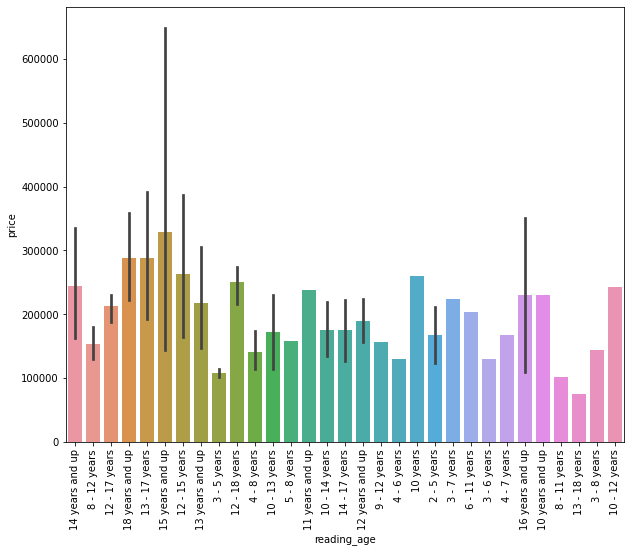

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
sns.barplot(eksplor["reading_age"],train["price"])
plt.xticks(rotation=90)

In [ ]:
eksplor['lexile_measure'].unique()

array([nan, 'HL740L', '760L', '880L', '710L', '930', 'HL720L', '690',
       'HL590L', 'HL700L', '990L', 'AD460L', '740L', '950L', '770L',
       '790L', 'HL750L', 'GN370L', '860L', 'GN400L', '730L', 'AD300L',
       '850L', '1170L', '930L', 'AD510L', 'HL710L', 'AD380L', 'AD520L',
       'HL780L', 'NP', '570L', '690L', '980L', 'HL730L', 'AD600L', '640L',
       '230L', '130L', '800L', '840L', 'HL600L', '970', '940L', 'AD490L',
       '920L', 'HL580L', '1010L', '630L', 'HL680L', 'HL790L', '710',
       'AD450L', '1260L', '960L', '360L', '1100L', 'AD650L', 'AD550L',
       'AD660L', '720L', '670'], dtype=object)

In [ ]:
condition = [
             eksplor["lexile_measure"].str.match(r"AD\d+") == True,
             eksplor["lexile_measure"].str.match(r"HL\d+") == True,
             eksplor["lexile_measure"].str.match(r"GN\d+") == True,
             eksplor["lexile_measure"].str.match(r"\d+") == True,
             eksplor["lexile_measure"].str.match(r"NP") == True,
]
res = [
        "adult directed",
        "high low",
        "comic",
        "ordinary",
        "entertainment"
]

eksplor["lexile_codes"] = np.select(condition,res)
eksplor["lexile_codes"] = eksplor["lexile_codes"].replace({
    "0" : 400,
    "adult directed" : 401,
    "comic": 402,
    "high low" : 403,
    "ordinary" : 404,
    "entertainment" : 405
})
eksplor.head(1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,description,reading_age,lexile_measure,grade_level,lexile_codes
0,"Just after the Second World War, in the small ...",NaN,NaN,NaN,400


In [ ]:
eksplor["lexile_measureNumber"] = eksplor["lexile_measure"].str.replace(r"[a-zA-Z]",'')

eksplor["lexile_measureNumber"].unique()
eksplor["lexile_measureNumber"].fillna("0",inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
eksplor[eksplor['lexile_measureNumber'] == ""] = 400

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [ ]:
eksplor[eksplor['lexile_measureNumber'] == "" ]

,description,reading_age,lexile_measure,grade_level,lexile_codes,lexile_measureNumber


In [ ]:
eksplor["lexile_measureNumber"].unique()

array(['0', '740', '760', '880', '710', '930', '720', '690', '590', '700',
       '990', '460', '950', '770', '790', '750', '370', '860', '400',
       '730', '300', '850', '1170', '510', '380', '520', '780', 400,
       '570', '980', '600', '640', '230', '130', '800', '840', '970',
       '940', '490', '920', '580', '1010', '630', '680', '450', '1260',
       '960', '360', '1100', '650', '550', '660', '670'], dtype=object)

In [ ]:
eksplor['lexile_measureNumber'] = eksplor["lexile_measureNumber"].astype('float')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
condition = [
             (eksplor["lexile_measureNumber"] > 190) & (eksplor["lexile_measureNumber"] < 925),
             (eksplor["lexile_measureNumber"] > 925 ) & (eksplor["lexile_measureNumber"] < 1050),
             (eksplor["lexile_measureNumber"] > 1050)
]

res = [
       "low",
       "sufficient",
       "proficient"
]

res = np.select(condition,res)
eksplor["lexile_categorical"] = res
eksplor["lexile_categorical"] = eksplor['lexile_categorical'].replace({
    "low" : 501,
    "sufficient" : 502,
    "proficient" : 503,
    "0" : 500
})


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
eksplor["grade_level"].unique()

array([nan, '9 - 12', '3 - 7', '7 - 9', '10 - 12', '10 and up',
       'Preschool - Kindergarten', '7 - 12', '5 - 6', 'Kindergarten - 3',
       '6 - 9', '8 and up', '5 - 9', '4 - 7', 'Preschool - 1',
       'Preschool - 3', '8 - 12', '8 - 9', 'Preschool - 2', 400,
       '9 and up', '1 - 2', '11 and up', '4 - 6', '7 and up', '5 - 8',
       '5 - 7'], dtype=object)

In [ ]:
condition  = [
              (eksplor["grade_level"] == "Preschool - Kindergarten") | (eksplor["grade_level"] == "Kindergarten - 3") |
              (eksplor["grade_level"] == "Preschool - 1") | (eksplor["grade_level"] == "Preschool - 2") |
              (eksplor["grade_level"] == "Preschool - 2") | (eksplor["grade_level"] == "1 - 2"),
              
              (eksplor["grade_level"] == "3 - 7") | (eksplor["grade_level"] == "4 - 6") |
              (eksplor["grade_level"] == "5 - 6") | (eksplor["grade_level"] == "4 - 7") ,


              (eksplor["grade_level"] == "5 - 8") | (eksplor["grade_level"] == "5 - 7") |
              (eksplor["grade_level"] == "5 - 9") | (eksplor["grade_level"] == "6 - 9") |
              (eksplor["grade_level"] == "6 - 9"), 


              (eksplor["grade_level"] == "8 and up") | (eksplor["grade_level"] == "9 and up") |
              (eksplor["grade_level"] == "7 and up") | (eksplor["grade_level"] == "10 and up") |
              (eksplor["grade_level"] == "8 - 12") | (eksplor["grade_level"] == "8 - 9") |
              (eksplor["grade_level"] == "9 - 12") | (eksplor["grade_level"] == "7 - 9") |
              (eksplor["grade_level"] == "10 - 12") | (eksplor["grade_level"] ==  "11 and up") |
              (eksplor["grade_level"] == "7 - 12")
]

res = [
       "very easy",
       "easy",
       "medium",
       "hard"
]

eksplor["grade_category"] = np.select(condition,res)
eksplor['grade_category']  = eksplor["grade_category"].replace({
    "0" : 600,
    "very easy" : 601,
    "easy" : 602,
    "medium" : 603,
    "hard" : 604
})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
condition = [ 
           ((eksplor['reading_age'] == "3 - 5 years") | (eksplor["reading_age"] == "4 - 8 years") |
           (eksplor["reading_age"] == "5 - 8 years") | (eksplor["reading_age"] == "3 - 7 years") |
           (eksplor["reading_age"] == "3 - 6 years") | (eksplor["reading_age"] == "4 - 6 years") |
           (eksplor["reading_age"] == "4 - 7 years") | (eksplor["reading_age"] == "3 - 8 years") |
           (eksplor["reading_age"] == "2 - 5 years")) ,

           ((eksplor["reading_age"] == "8 - 11 years") | (eksplor["reading_age"] == "8 - 12 years")) |
           ((eksplor["reading_age"] == "10 - 13 years") | (eksplor["reading_age"] == "9 - 12 years") | 
           (eksplor["reading_age"] == "10 - 12 years") | (eksplor["reading_age"] == "10 years") |
           (eksplor["reading_age"] == "10 years and up") | (eksplor["reading_age"] == "6 - 11 years")),

           ((eksplor["reading_age"] == "12 - 15 years") | (eksplor["reading_age"] == "13 years and up") |
           (eksplor["reading_age"] == "10 - 14 years") | (eksplor["reading_age"] == "12 years up") | 
           (eksplor["reading_age"] == "11 years up") | (eksplor["reading_age"] == "14 years and up") |
           (eksplor["reading_age"] == "15 years and up") | (eksplor["reading_age"] == "12 years and up"))

]

result =[
         "TK","SD","Others"
]
val = np.select(condition,result)
eksplor.loc[:,"reading_age_converted"] = val
eksplor['reading_age_converted'] = eksplor["reading_age_converted"].replace({"Others" : 703, "SD" : 704, "TK" : 1,"0" : 705})
eksplor.head(3)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

,description,reading_age,lexile_measure,grade_level,lexile_codes,lexile_measureNumber,lexile_categorical,grade_category,reading_age_converted
0,"Just after the Second World War, in the small ...",NaN,NaN,NaN,400,0.0,500,600,705
1,"Blame it on Hawaii’s rainbows, sparkling beach...",NaN,NaN,NaN,400,0.0,500,600,705
2,"The Pulitzer Prize–winning, bestselling author...",NaN,NaN,NaN,400,0.0,500,600,705


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60]),
 <a list of 61 Text major ticklabel objects>)

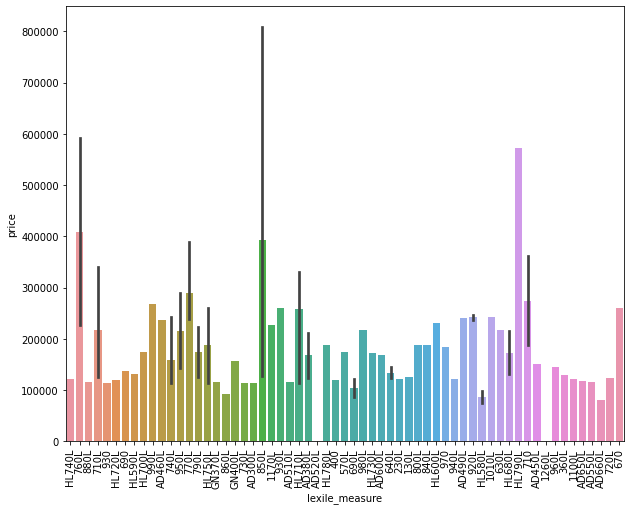

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
sns.barplot(eksplor["lexile_measure"],train["price"])
plt.xticks(rotation=90)

In [ ]:
eksplor.head(3)
train["lexile_codes"] = eksplor["lexile_codes"]
train["lexile_measureNumber"] = eksplor["lexile_measureNumber"]
train["lexile_categorical"] = eksplor["lexile_categorical"]
train["grade_category"] = eksplor["grade_category"]
train["reading_age_converted"] = eksplor["reading_age_converted"]


In [ ]:
train

,author_id,bookformat,bookedition,pages,publisher_id,weight,rating_value_0,rating_value_1,genre_0,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7,genre_8,genre_9,genre_0_weight,genre_1_weight,genre_2_weight,genre_3_weight,genre_4_weight,genre_5_weight,genre_6_weight,genre_7_weight,genre_8_weight,genre_9_weight,price,totalRating,weightRating1,weightRating0,weightKategori,volume,weight_per_page,lexile_codes,lexile_measureNumber,lexile_categorical,grade_category,reading_age_converted
0,1718,2,-1,309,-1,2014.433338,3.76,0.0,0,5,89,92,19,159,101,58,251,31,0.45,0.22,0.08,0.06,0.05,0.04,0.03,0.02,0.02,0.02,NaN,26626,100,205,303,1642.019292,6.519202,400,0.0,500,600,705
1,817,7,-1,344,-1,1825.785839,4.48,0.0,1,999,999,999,999,999,999,999,999,999,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,22,100,205,303,1650.185652,5.307517,400,0.0,500,600,705
2,878,2,-1,496,-1,944.664231,4.56,0.0,2,4,52,93,208,92,109,177,145,115,0.42,0.22,0.08,0.08,0.05,0.05,0.04,0.02,0.02,0.02,NaN,59886,100,206,301,1859.728210,1.904565,400,0.0,500,600,705
3,1049,2,26,418,-1,1394.816621,4.39,0.0,3,11,5,82,27,92,56,15,296,54,0.41,0.30,0.08,0.05,0.04,0.04,0.03,0.02,0.02,0.02,NaN,26644,100,205,302,1762.791662,3.336882,400,0.0,500,600,705
4,2141,2,-1,784,-1,-0.000000,3.93,0.0,4,2,135,32,89,334,92,52,388,452,0.42,0.30,0.09,0.08,0.04,0.02,0.01,0.01,0.01,0.01,NaN,11773,100,205,300,2234.379245,-0.000000,400,0.0,500,600,705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3545,925,7,53,448,-1,1215.295673,4.19,0.0,19,57,29,10,77,244,5,31,329,201,0.36,0.24,0.10,0.07,0.07,0.06,0.03,0.02,0.02,0.02,NaN,172199,100,205,302,1816.875894,2.712714,400,0.0,500,600,705
3546,2338,2,-1,478,-1,1041.068141,4.21,0.0,3,24,101,5,11,27,194,92,58,10,0.43,0.18,0.11,0.11,0.04,0.04,0.03,0.02,0.02,0.02,NaN,43150,100,205,302,1856.574235,2.177967,400,0.0,500,600,705
3547,1059,2,26,352,-1,1758.964655,3.55,0.0,8,81,2,26,256,999,999,999,999,999,0.68,0.14,0.13,0.05,0.01,0.00,0.00,0.00,0.00,0.00,NaN,5812,100,205,303,1719.444369,4.997059,400,0.0,500,600,705
3548,1482,3,-1,349,-1,1800.329600,4.64,0.0,36,999,999,999,999,999,999,999,999,999,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,15,100,206,303,1647.731538,5.158538,400,0.0,500,600,705


In [ ]:
#Convert to one hot Encoding
dummiesLexileCodes = pd.get_dummies(train["lexile_codes"])
dummiessLexileCategorical = pd.get_dummies(train["lexile_categorical"])
dummiesGradeCategory = pd.get_dummies(train["grade_category"])
dummiesReadingAge = pd.get_dummies(train["reading_age_converted"])
#dummiesBookFormat = pd.get_dummies(train["bookformat"])
#dummiesBookEdition = pd.get_dummies(train["bookedition"])
#dummiesGenre = pd.get_dummies(train["genre_0"])

droppedCols = ["lexile_codes",
               "lexile_categorical","grade_category",
               "reading_age_converted"
               ]

train[dummiesLexileCodes.columns] = dummiesLexileCodes
train[dummiessLexileCategorical.columns] = dummiessLexileCategorical
train[dummiesGradeCategory.columns] = dummiesGradeCategory
train[dummiesReadingAge.columns] = dummiesReadingAge
#train[dummiesBookEdition.columns] = dummiesBookEdition.columns
#train[dummiesBookFormat.columns] = dummiesBookFormat.columns

train.drop(droppedCols,axis=1,inplace=True)

In [ ]:
train

,author_id,bookformat,bookedition,pages,publisher_id,weight,rating_value_0,rating_value_1,genre_0,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7,genre_8,genre_9,genre_0_weight,genre_1_weight,genre_2_weight,genre_3_weight,genre_4_weight,genre_5_weight,genre_6_weight,genre_7_weight,genre_8_weight,genre_9_weight,price,totalRating,weightRating1,weightRating0,weightKategori,volume,weight_per_page,lexile_measureNumber,400,401,402,403,404,500,501,502,503,600,601,602,603,604,1,703,704,705
0,1718,2,-1,309,-1,2014.433338,3.76,0.0,0,5,89,92,19,159,101,58,251,31,0.45,0.22,0.08,0.06,0.05,0.04,0.03,0.02,0.02,0.02,NaN,26626,100,205,303,1642.019292,6.519202,0.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
1,817,7,-1,344,-1,1825.785839,4.48,0.0,1,999,999,999,999,999,999,999,999,999,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,22,100,205,303,1650.185652,5.307517,0.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
2,878,2,-1,496,-1,944.664231,4.56,0.0,2,4,52,93,208,92,109,177,145,115,0.42,0.22,0.08,0.08,0.05,0.05,0.04,0.02,0.02,0.02,NaN,59886,100,206,301,1859.728210,1.904565,0.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
3,1049,2,26,418,-1,1394.816621,4.39,0.0,3,11,5,82,27,92,56,15,296,54,0.41,0.30,0.08,0.05,0.04,0.04,0.03,0.02,0.02,0.02,NaN,26644,100,205,302,1762.791662,3.336882,0.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
4,2141,2,-1,784,-1,-0.000000,3.93,0.0,4,2,135,32,89,334,92,52,388,452,0.42,0.30,0.09,0.08,0.04,0.02,0.01,0.01,0.01,0.01,NaN,11773,100,205,300,2234.379245,-0.000000,0.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3545,925,7,53,448,-1,1215.295673,4.19,0.0,19,57,29,10,77,244,5,31,329,201,0.36,0.24,0.10,0.07,0.07,0.06,0.03,0.02,0.02,0.02,NaN,172199,100,205,302,1816.875894,2.712714,0.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
3546,2338,2,-1,478,-1,1041.068141,4.21,0.0,3,24,101,5,11,27,194,92,58,10,0.43,0.18,0.11,0.11,0.04,0.04,0.03,0.02,0.02,0.02,NaN,43150,100,205,302,1856.574235,2.177967,0.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
3547,1059,2,26,352,-1,1758.964655,3.55,0.0,8,81,2,26,256,999,999,999,999,999,0.68,0.14,0.13,0.05,0.01,0.00,0.00,0.00,0.00,0.00,NaN,5812,100,205,303,1719.444369,4.997059,0.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
3548,1482,3,-1,349,-1,1800.329600,4.64,0.0,36,999,999,999,999,999,999,999,999,999,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,15,100,206,303,1647.731538,5.158538,0.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1


##buat model

In [ ]:
noNan = train[train["price"].notna()]
noNan = noNan[noNan['price'] != 0]
data=noNan.drop(["author_id",'price',"publisher_id"],axis=1)
label=noNan['price']

In [ ]:
Nan = train[~train["price"].notna()]
Nan = Nan.drop(["author_id","publisher_id",],axis=1)
Nan["price"].fillna(0.0,inplace=True)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
data

,bookformat,bookedition,pages,weight,rating_value_0,rating_value_1,genre_0,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7,genre_8,genre_9,genre_0_weight,genre_1_weight,genre_2_weight,genre_3_weight,genre_4_weight,genre_5_weight,genre_6_weight,genre_7_weight,genre_8_weight,genre_9_weight,totalRating,weightRating1,weightRating0,weightKategori,volume,weight_per_page,lexile_measureNumber,400,401,402,403,404,500,501,502,503,600,601,602,603,604,1,703,704,705
9,5,-1,504,3628.740000,4.29,4.6,7,27,19,219,3,196,71,101,11,296,0.26,0.21,0.17,0.10,0.08,0.05,0.04,0.04,0.03,0.02,27487,106,205,304,593.963040,7.199881,0.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
17,3,-1,357,1760.554226,4.89,0.0,999,999,999,999,999,999,999,999,999,999,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,28,100,206,303,1643.900087,4.931524,0.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
29,7,-1,324,3991.610000,3.99,4.6,15,5,92,68,29,62,101,10,6,58,0.45,0.19,0.07,0.07,0.06,0.05,0.04,0.04,0.03,0.02,45194,106,205,304,497.887170,12.319784,0.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
33,2,-1,528,771.110000,3.68,4.3,3,5,99,221,82,53,172,19,101,92,0.77,0.07,0.05,0.02,0.02,0.02,0.02,0.01,0.01,0.01,20886,105,205,301,1742.425776,1.460436,0.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
44,7,-1,500,725.750000,3.81,3.6,999,999,999,999,999,999,999,999,999,999,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,41,105,205,301,1104.384888,1.451500,0.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3518,2,-1,351,512.560000,3.83,4.2,15,6,5,62,162,68,92,101,19,78,0.28,0.20,0.17,0.09,0.08,0.07,0.03,0.03,0.02,0.02,77636,105,205,301,1423.025856,1.460285,0.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
3522,2,-1,257,566.990000,4.12,4.7,15,5,126,281,68,30,125,365,92,101,0.37,0.25,0.16,0.06,0.04,0.03,0.03,0.03,0.02,0.02,15564,106,205,301,1029.472146,2.206187,0.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
3529,2,-1,444,780.180000,3.84,4.4,2,25,4,32,194,14,166,1,51,260,0.43,0.23,0.07,0.07,0.06,0.05,0.03,0.03,0.03,0.02,7998,105,205,301,1257.093120,1.757162,0.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
3538,2,-1,64,3265.860000,4.26,4.8,30,5,17,39,106,92,75,9,101,20,0.39,0.14,0.09,0.08,0.07,0.06,0.06,0.05,0.04,0.02,101271,106,205,304,342.827100,51.029063,0.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1


In [ ]:
scalerData =  MinMaxScaler()
scalerNan = MinMaxScaler()
scalerLabel = MinMaxScaler()
numerics = [
            "pages"	,"weight","rating_value_0"
            ,"rating_value_1",'genre_0_weight',	'genre_1_weight',	'genre_2_weight'	
            ,'genre_3_weight'	,'genre_4_weight'	,'genre_5_weight',	'genre_6_weight'	
            ,'genre_7_weight',	"genre_8_weight",	"genre_9_weight",'totalRating'	,'weightRating1'	,'weightRating0'	
            ,'weightKategori'	,'volume'	,"weight_per_page","lexile_measureNumber",
            "genre_0","genre_1","genre_2","genre_3","genre_4","genre_5","genre_6","genre_7","genre_8","genre_9","lexile_measureNumber"
]
data[numerics] = scalerData.fit_transform(data[numerics].astype('float32'))
label= scalerLabel.fit_transform(label.values.reshape(-1,1))

Nan[numerics] = scalerNan.fit_transform(Nan[numerics].astype('float32'))

In [ ]:
data

,bookformat,bookedition,pages,weight,rating_value_0,rating_value_1,genre_0,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7,genre_8,genre_9,genre_0_weight,genre_1_weight,genre_2_weight,genre_3_weight,genre_4_weight,genre_5_weight,genre_6_weight,genre_7_weight,genre_8_weight,genre_9_weight,totalRating,weightRating1,weightRating0,weightKategori,volume,weight_per_page,lexile_measureNumber,400,401,402,403,404,500,501,502,503,600,601,602,603,604,1,703,704,705
9,5,-1,0.501259,0.503145,0.858,0.92,0.007007,0.027027,0.019019,0.219219,0.003003,0.195391,0.070140,0.100200,0.011011,0.296296,0.26,0.42,0.586207,0.555556,0.571429,0.5,0.4,0.571429,0.500000,0.4,0.008821,1.000000,0.995146,1.00,0.079527,0.222836,0.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
17,3,-1,0.377834,0.244111,0.978,0.00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.00,0.00,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000009,0.943396,1.000000,0.75,0.255768,0.216182,0.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
29,7,-1,0.350126,0.553459,0.798,0.92,0.015015,0.005005,0.092092,0.068068,0.029029,0.061122,0.100200,0.009018,0.006006,0.058058,0.45,0.38,0.241379,0.388889,0.428571,0.5,0.4,0.571429,0.500000,0.4,0.014504,1.000000,0.995146,1.00,0.063399,0.237853,0.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
33,2,-1,0.521411,0.106919,0.736,0.86,0.003003,0.005005,0.099099,0.221221,0.082082,0.052104,0.171343,0.018036,0.101101,0.092092,0.77,0.14,0.172414,0.111111,0.142857,0.2,0.2,0.142857,0.166667,0.2,0.006703,0.990566,0.995146,0.25,0.272307,0.206001,0.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
44,7,-1,0.497901,0.100629,0.762,0.72,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.00,0.00,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000013,0.990566,0.995146,0.25,0.165206,0.205974,0.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3518,2,-1,0.372796,0.071069,0.766,0.84,0.015015,0.006006,0.005005,0.062062,0.162162,0.067134,0.091182,0.100200,0.019019,0.078078,0.28,0.40,0.586207,0.500000,0.571429,0.7,0.3,0.428571,0.333333,0.4,0.024916,0.990566,0.995146,0.25,0.218693,0.206000,0.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
3522,2,-1,0.293871,0.078616,0.824,0.94,0.015015,0.005005,0.126126,0.281281,0.068068,0.029058,0.124248,0.364729,0.092092,0.101101,0.37,0.50,0.551724,0.333333,0.285714,0.3,0.3,0.428571,0.333333,0.4,0.004995,1.000000,0.995146,0.25,0.152631,0.208188,0.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
3529,2,-1,0.450882,0.108176,0.768,0.88,0.002002,0.025025,0.004004,0.032032,0.194194,0.013026,0.165331,0.000000,0.051051,0.260260,0.43,0.46,0.241379,0.388889,0.428571,0.5,0.3,0.428571,0.500000,0.4,0.002567,0.990566,0.995146,0.25,0.190839,0.206871,0.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
3538,2,-1,0.131822,0.452830,0.852,0.96,0.030030,0.005005,0.017017,0.039039,0.106106,0.091182,0.074148,0.008016,0.101101,0.020020,0.39,0.28,0.310345,0.444444,0.500000,0.6,0.6,0.714286,0.666667,0.4,0.032502,1.000000,0.995146,1.00,0.037371,0.351395,0.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_val,y_train,y_val = train_test_split(data,label,random_state=4,test_size=0.2)

In [ ]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:

rfr = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=4, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
rfr.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=4, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
ypred = rfr.predict(x_val)
print(f"Random Forest MSE : {mean_squared_error(y_val,ypred)}")
print(f"Random Forest RMSE : {np.sqrt(mean_squared_error(y_val,ypred))}")



Random Forest MSE : 0.01135733383661164
Random Forest RMSE : 0.10657079260572119


In [ ]:
ypred

array([0.15820537, 0.27337447, 0.26424087, 0.26624192, 0.18075492,
       0.27034408, 0.25347624, 0.1199056 , 0.15473968, 0.25222036,
       0.2771881 , 0.24170569, 0.22030551, 0.22597174, 0.30747451,
       0.29414405, 0.26787629, 0.29819625, 0.22327256, 0.07570953,
       0.19687352, 0.23339362, 0.19582251, 0.10062593, 0.31999799,
       0.09795879, 0.26207113, 0.28524293, 0.26653143, 0.25351328,
       0.27359471, 0.10171098, 0.20300014, 0.16652541, 0.31012256,
       0.07328958, 0.20623203, 0.07080993, 0.26633432, 0.17063993,
       0.17083917, 0.17677546, 0.07087653, 0.19495787, 0.27089118,
       0.10253549, 0.24433287, 0.10261626, 0.30258822, 0.30808252,
       0.09803282, 0.27392034, 0.06977059, 0.33299662, 0.22253427,
       0.15786437, 0.19885634, 0.09328396, 0.17199886, 0.30695411,
       0.31988493, 0.09895021, 0.28140021, 0.20097994, 0.26021744,
       0.33054139, 0.26334282, 0.24608161, 0.28679166, 0.27666828,
       0.27666079, 0.26608734, 0.32129025, 0.31710377, 0.07076

In [ ]:
ypred

array([0.15820537, 0.27337447, 0.26424087, 0.26624192, 0.18075492,
       0.27034408, 0.25347624, 0.1199056 , 0.15473968, 0.25222036,
       0.2771881 , 0.24170569, 0.22030551, 0.22597174, 0.30747451,
       0.29414405, 0.26787629, 0.29819625, 0.22327256, 0.07570953,
       0.19687352, 0.23339362, 0.19582251, 0.10062593, 0.31999799,
       0.09795879, 0.26207113, 0.28524293, 0.26653143, 0.25351328,
       0.27359471, 0.10171098, 0.20300014, 0.16652541, 0.31012256,
       0.07328958, 0.20623203, 0.07080993, 0.26633432, 0.17063993,
       0.17083917, 0.17677546, 0.07087653, 0.19495787, 0.27089118,
       0.10253549, 0.24433287, 0.10261626, 0.30258822, 0.30808252,
       0.09803282, 0.27392034, 0.06977059, 0.33299662, 0.22253427,
       0.15786437, 0.19885634, 0.09328396, 0.17199886, 0.30695411,
       0.31988493, 0.09895021, 0.28140021, 0.20097994, 0.26021744,
       0.33054139, 0.26334282, 0.24608161, 0.28679166, 0.27666828,
       0.27666079, 0.26608734, 0.32129025, 0.31710377, 0.07076

In [ ]:
import tensorflow as tf
import math
from tensorflow.keras import backend as K
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 


Percentage = 0.3
input = tf.keras.layers.Input(shape=(x_train.shape[1]))

layers = tf.keras.layers.Dense(units=1024,activation=tf.nn.relu)(input)
layers = tf.keras.layers.Dropout(Percentage + 0.5 )(layers)
layers = tf.keras.layers.Dense(units=128,activation=tf.nn.relu)(layers)
layers = tf.keras.layers.Dense(units=128,activation=tf.nn.relu)(layers)
layers = tf.keras.layers.Dense(units=52,activation=tf.nn.relu)(layers)
layers = tf.keras.layers.Dropout(Percentage )(layers)
layers = tf.keras.layers.Dense(units=1)(layers)
model = tf.keras.Model(inputs=[input],outputs=[layers])
model.compile(loss=root_mean_squared_error,optimizer=tf.keras.optimizers.Adam())
model.summary()

def create_learning_rate_scheduler(max_learn_rate=1e-3,
                                   end_learn_rate=1e-4,
                                   warmup_epoch_count=150,
                                   total_epoch_count=200):

    def lr_scheduler(epoch):
        if epoch < warmup_epoch_count:
            res = max_learn_rate
        else:
            res = max_learn_rate*math.exp(math.log(end_learn_rate/max_learn_rate)*(epoch-warmup_epoch_count+1)/(total_epoch_count-warmup_epoch_count+1))
        return float(res)
    learning_rate_scheduler = tf.keras.callbacks.LearningRateScheduler(lr_scheduler, verbose=1)

    return learning_rate_scheduler

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 51)]              0         
_________________________________________________________________
dense_5 (Dense)              (None, 1024)              53248     
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               131200    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_8 (Dense)              (None, 52)                6708      
_________________________________________________________________
dropout_3 (Dropout)          (None, 52)                0   

In [ ]:
noNan

,author_id,bookformat,bookedition,pages,publisher_id,weight,rating_value_0,rating_value_1,genre_0,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7,genre_8,genre_9,genre_0_weight,genre_1_weight,genre_2_weight,genre_3_weight,genre_4_weight,genre_5_weight,genre_6_weight,genre_7_weight,genre_8_weight,genre_9_weight,price,totalRating,weightRating1,weightRating0,weightKategori,volume,weight_per_page,lexile_measureNumber,400,401,402,403,404,500,501,502,503,600,601,602,603,604,1,703,704,705
9,743,5,-1,504,102,3628.740000,4.29,4.6,7,27,19,219,3,196,71,101,11,296,0.26,0.21,0.17,0.10,0.08,0.05,0.04,0.04,0.03,0.02,98172.0,27487,106,205,304,593.963040,7.199881,0.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
17,1858,3,-1,357,-1,1760.554226,4.89,0.0,999,999,999,999,999,999,999,999,999,999,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,57604.0,28,100,206,303,1643.900087,4.931524,0.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
29,1942,7,-1,324,238,3991.610000,3.99,4.6,15,5,92,68,29,62,101,10,6,58,0.45,0.19,0.07,0.07,0.06,0.05,0.04,0.04,0.03,0.02,103658.0,45194,106,205,304,497.887170,12.319784,0.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
33,2268,2,-1,528,72,771.110000,3.68,4.3,3,5,99,221,82,53,172,19,101,92,0.77,0.07,0.05,0.02,0.02,0.02,0.02,0.01,0.01,0.01,649665.0,20886,105,205,301,1742.425776,1.460436,0.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
44,379,7,-1,500,121,725.750000,3.81,3.6,999,999,999,999,999,999,999,999,999,999,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,247883.0,41,105,205,301,1104.384888,1.451500,0.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3518,812,2,-1,351,75,512.560000,3.83,4.2,15,6,5,62,162,68,92,101,19,78,0.28,0.20,0.17,0.09,0.08,0.07,0.03,0.03,0.02,0.02,262176.0,77636,105,205,301,1423.025856,1.460285,0.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
3522,65,2,-1,257,163,566.990000,4.12,4.7,15,5,126,281,68,30,125,365,92,101,0.37,0.25,0.16,0.06,0.04,0.03,0.03,0.03,0.02,0.02,216411.0,15564,106,205,301,1029.472146,2.206187,0.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
3529,780,2,-1,444,212,780.180000,3.84,4.4,2,25,4,32,194,14,166,1,51,260,0.43,0.23,0.07,0.07,0.06,0.05,0.03,0.03,0.03,0.02,152310.0,7998,105,205,301,1257.093120,1.757162,0.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
3538,26,2,-1,64,4,3265.860000,4.26,4.8,30,5,17,39,106,92,75,9,101,20,0.39,0.14,0.09,0.08,0.07,0.06,0.06,0.05,0.04,0.02,176853.0,101271,106,205,304,342.827100,51.029063,0.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1


In [ ]:
model.fit(x_train,y_train,epochs=200,
          callbacks=[create_learning_rate_scheduler()],verbose=0)


Epoch 00001: LearningRateScheduler reducing learning rate to 0.001.

Epoch 00002: LearningRateScheduler reducing learning rate to 0.001.

Epoch 00003: LearningRateScheduler reducing learning rate to 0.001.

Epoch 00004: LearningRateScheduler reducing learning rate to 0.001.

Epoch 00005: LearningRateScheduler reducing learning rate to 0.001.

Epoch 00006: LearningRateScheduler reducing learning rate to 0.001.

Epoch 00007: LearningRateScheduler reducing learning rate to 0.001.

Epoch 00008: LearningRateScheduler reducing learning rate to 0.001.

Epoch 00009: LearningRateScheduler reducing learning rate to 0.001.

Epoch 00010: LearningRateScheduler reducing learning rate to 0.001.

Epoch 00011: LearningRateScheduler reducing learning rate to 0.001.

Epoch 00012: LearningRateScheduler reducing learning rate to 0.001.

Epoch 00013: LearningRateScheduler reducing learning rate to 0.001.

Epoch 00014: LearningRateScheduler reducing learning rate to 0.001.

Epoch 00015: LearningRateSchedule

In [ ]:
ypred = model.predict(x_val,)
print(f"DL MSE  : {mean_squared_error(y_val,ypred)}")
print(f"DL RMSE : {np.sqrt(mean_squared_error(y_val,ypred))}")

DL MSE  : 0.013565341715048952
DL RMSE : 0.11647034693452644


In [ ]:
rfr = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=4, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
rfr.fit(data,label)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=4, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x_train, y_train)

ypred = reg.predict(x_val)
print(f"Linear Regression MSE : {mean_squared_error(y_val,ypred)}")
print(f"Linear Regression RMSE : {np.sqrt(mean_squared_error(y_val,ypred))}")


from sklearn.tree import DecisionTreeRegressor

dcs=DecisionTreeRegressor().fit(x_train,y_train)
ypred = dcs.predict(x_val)
print(f"Decision Regression MSE : {mean_squared_error(y_val,ypred)}")
print(f"Decision Regression RMSE : {np.sqrt(mean_squared_error(y_val,ypred))}")


from sklearn.svm import SVR

svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1).fit(x_train,y_train)
ypred = svr_rbf.predict(x_val)
print(f"SVR MSE : {mean_squared_error(y_val,ypred)}")
print(f"SVR RMSE : {np.sqrt(mean_squared_error(y_val,ypred))}")


from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=10).fit(x_train,y_train)
ypred = knn.predict(x_val)
print(f"KNN MSE : {mean_squared_error(y_val,ypred)}")
print(f"KNN RMSE : {np.sqrt(mean_squared_error(y_val,ypred))}")


from sklearn.ensemble import VotingRegressor

vote = VotingRegressor([('decesionTreeReg', dcs),("randomforest",RandomForestRegressor()),('svr',svr_rbf),('knn',knn)]).fit(x_train,y_train)
ypred = vote.predict(x_val)
print(f"Voting Regressor MSE : {mean_squared_error(y_val,ypred)}")
print(f"Voting Regressor RMSE : {np.sqrt(mean_squared_error(y_val,ypred))}")



Linear Regression MSE : 0.7838576085029784
Linear Regression RMSE : 0.8853573337940892
Decision Regression MSE : 0.023022164374003493
Decision Regression RMSE : 0.15173056506190008
SVR MSE : 0.024222843039368114
SVR RMSE : 0.1556368948526284
KNN MSE : 0.013242152553027745
KNN RMSE : 0.11507455215219282


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_voting.py:406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Voting Regressor MSE : 0.013182484163773435
Voting Regressor RMSE : 0.11481499973336862


In [ ]:
from sklearn.metrics import mean_absolute_error,mean_absolute_error
def printTheOutput(model,modelName):
    ypred = model.predict(x_val)
    print(f"{modelName} Mean : {np.mean(ypred)} ")
    print(f"{modelName} Median : {np.median(ypred)}")
    print(f"{modelName} STD : {np.std(ypred)}")
    print(f"{modelName} MAE : {mean_absolute_error(y_val,ypred)}")
    print(f"{modelName} MSE : {mean_squared_error(y_val,ypred)}")
    print(f"{modelName} RMSE : {np.sqrt(mean_squared_error(y_val,ypred))}")
    print()
printTheOutput(reg,"Regression")
printTheOutput(knn,"KNN")
printTheOutput(dcs,"Decision Tree")
printTheOutput(rfr,"Random Forest")
printTheOutput(vote,"Voting Classifier")
printTheOutput(model,"DeepLearning")

Regression Mean : 0.1323685462155811 
Regression Median : 0.22626618155270606
Regression STD : 0.8946985439235283
Regression MAE : 0.17031521607343447
Regression MSE : 0.7838576085029784
Regression RMSE : 0.8853573337940892
KNN Mean : 0.20857138645671103 
KNN Median : 0.2188379445328399
KNN STD : 0.08351942115416357
KNN MAE : 0.07823720410716754
KNN MSE : 0.013242152553027745
KNN RMSE : 0.11507455215219282
Decision Tree Mean : 0.2132282782113535 
Decision Tree Median : 0.17969467960858912
Decision Tree STD : 0.12742310085680658
Decision Tree MAE : 0.10358046200613603
Decision Tree MSE : 0.023022164374003493
Decision Tree RMSE : 0.15173056506190008
Random Forest Mean : 0.21546163803081808 
Random Forest Median : 0.2268076904515675
Random Forest STD : 0.07834008538148564
Random Forest MAE : 0.06991164554488719
Random Forest MSE : 0.01135733383661164
Random Forest RMSE : 0.10657079260572119
Voting Classifier Mean : 0.21114960858673928 
Voting Classifier Median : 0.23281295759909823
Voting

In [ ]:
ypred = rfr.predict(data,)
np.sqrt(mean_squared_error(label,ypred))

0.1019111749446989

In [ ]:
predictedTrainPrice = rfr.predict(Nan.drop("price",axis=1))

In [ ]:
predictedTrainPrice = scalerLabel.inverse_transform(predictedTrainPrice.reshape(-1,1))
predictedTrainPrice

array([[342382.87120872],
       [377019.39773187],
       [321158.14316073],
       ...,
       [314485.62502351],
       [207664.64592891],
       [323134.30870389]])

In [ ]:
Nan['price'] = predictedTrainPrice

In [ ]:
Nan[numerics] = scalerNan.inverse_transform(Nan[numerics])
Nan

,bookformat,bookedition,pages,weight,rating_value_0,rating_value_1,genre_0,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7,genre_8,genre_9,genre_0_weight,genre_1_weight,genre_2_weight,genre_3_weight,genre_4_weight,genre_5_weight,genre_6_weight,genre_7_weight,genre_8_weight,genre_9_weight,price,totalRating,weightRating1,weightRating0,weightKategori,volume,weight_per_page,lexile_measureNumber,400,401,402,403,404,500,501,502,503,600,601,602,603,604,1,703,704,705
0,2,-1,308.999989,2014.433285,3.76,0.0,0.000000,5.000000,89.000000,91.999999,19.000000,158.999997,101.000001,58.000000,251.000003,31.000001,0.45,0.22,0.08,0.06,0.05,0.04,0.03,0.02,0.02,0.02,342382.871209,26625.999476,99.999997,204.999996,303.0,1642.019324,6.519202,0.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
1,7,-1,344.000014,1825.785988,4.48,0.0,1.000000,999.000015,999.000015,999.000015,999.000015,999.000015,999.000015,999.000015,999.000015,999.000015,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,377019.397732,21.999999,99.999997,204.999996,303.0,1650.185738,5.307517,0.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
2,2,-1,496.000003,944.664200,4.56,0.0,2.000000,4.000000,52.000000,92.999998,207.999998,91.999999,109.000004,177.000001,145.000005,115.000000,0.42,0.22,0.08,0.08,0.05,0.05,0.04,0.02,0.02,0.02,321158.143161,59885.999277,99.999997,205.999998,301.0,1859.728179,1.904565,0.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
3,2,26,417.999991,1394.816644,4.39,0.0,3.000000,11.000000,5.000000,81.999997,26.999999,91.999999,56.000001,15.000000,296.000007,53.999998,0.41,0.30,0.08,0.05,0.04,0.04,0.03,0.02,0.02,0.02,310687.558878,26643.999339,99.999997,204.999996,302.0,1762.791682,3.336882,0.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
4,2,-1,784.000019,0.000000,3.93,0.0,4.000000,2.000000,134.999996,32.000000,89.000000,334.000014,91.999999,52.000000,388.000013,452.000005,0.42,0.30,0.09,0.08,0.04,0.02,0.01,0.01,0.01,0.01,360815.854696,11772.999938,99.999997,204.999996,300.0,2234.379106,0.000000,0.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3545,7,53,448.000007,1215.295654,4.19,0.0,19.000000,57.000000,29.000000,10.000000,77.000000,244.000007,5.000000,31.000001,328.999987,201.000002,0.36,0.24,0.10,0.07,0.07,0.06,0.03,0.02,0.02,0.02,344506.650212,172198.996672,99.999997,204.999996,302.0,1816.875888,2.712714,0.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
3546,2,-1,477.999986,1041.068067,4.21,0.0,3.000000,24.000001,101.000001,5.000000,11.000000,26.999999,194.000006,91.999999,58.000000,10.000000,0.43,0.18,0.11,0.11,0.04,0.04,0.03,0.02,0.02,0.02,322923.910449,43150.001363,99.999997,204.999996,302.0,1856.574269,2.177967,0.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
3547,2,26,352.000014,1758.964606,3.55,0.0,8.000000,80.999998,2.000000,26.000000,256.000000,999.000015,999.000015,999.000015,999.000015,999.000015,0.68,0.14,0.13,0.05,0.01,0.00,0.00,0.00,0.00,0.00,314485.625024,5811.999654,99.999997,204.999996,303.0,1719.444322,4.997059,0.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
3548,3,-1,348.999987,1800.329552,4.64,0.0,36.000001,999.000015,999.000015,999.000015,999.000015,999.000015,999.000015,999.000015,999.000015,999.000015,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,207664.645929,15.000000,99.999997,205.999998,303.0,1647.731667,5.158538,0.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1


In [ ]:
datcopy = data.copy()
datcopy["price"] = scalerLabel.inverse_transform(label)
datcopy['price']

9        98172.0
17       57604.0
29      103658.0
33      649665.0
44      247883.0
          ...   
3518    262176.0
3522    216411.0
3529    152310.0
3538    176853.0
3541    216555.0
Name: price, Length: 542, dtype: float64

In [ ]:
datcopy[numerics] = scalerData.inverse_transform(datcopy[numerics])

In [ ]:
FullData = pd.concat([datcopy,Nan])
FullData

,bookformat,bookedition,pages,weight,rating_value_0,rating_value_1,genre_0,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7,genre_8,genre_9,genre_0_weight,genre_1_weight,genre_2_weight,genre_3_weight,genre_4_weight,genre_5_weight,genre_6_weight,genre_7_weight,genre_8_weight,genre_9_weight,totalRating,weightRating1,weightRating0,weightKategori,volume,weight_per_page,lexile_measureNumber,400,401,402,403,404,500,501,502,503,600,601,602,603,604,1,703,704,705,price
9,5,-1,504.000013,3628.739803,4.29,4.6,7.000000,26.999999,19.000000,219.000007,3.000000,196.000007,70.999998,100.999998,11.000000,296.000007,0.26,0.21,0.17,0.10,0.08,0.05,0.04,0.04,0.03,0.02,27486.999383,105.999998,204.999996,304.0,593.963024,7.199882,0.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,98172.000000
17,3,-1,356.999975,1760.554250,4.89,0.0,999.000015,999.000015,999.000015,999.000015,999.000015,999.000106,999.000106,999.000106,999.000015,999.000015,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,27.999998,99.999997,205.999998,303.0,1643.900070,4.931523,0.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,57604.000000
29,7,-1,324.000002,3991.609957,3.99,4.6,15.000000,5.000000,91.999999,67.999998,29.000000,62.000001,100.999998,9.999999,6.000000,58.000000,0.45,0.19,0.07,0.07,0.06,0.05,0.04,0.04,0.03,0.02,45193.999479,105.999998,204.999996,304.0,497.887154,12.319783,0.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,103658.000000
33,2,-1,528.000019,771.109986,3.68,4.3,3.000000,5.000000,99.000002,221.000005,81.999997,53.000003,171.999998,18.999999,101.000001,91.999999,0.77,0.07,0.05,0.02,0.02,0.02,0.02,0.01,0.01,0.01,20886.000318,105.000002,204.999996,301.0,1742.425816,1.460436,0.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,649665.000000
44,7,-1,499.999988,725.749981,3.81,3.6,999.000015,999.000015,999.000015,999.000015,999.000015,999.000106,999.000106,999.000106,999.000015,999.000015,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,40.999999,105.000002,204.999996,301.0,1104.384885,1.451500,0.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,247883.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3545,7,53,448.000007,1215.295654,4.19,0.0,19.000000,57.000000,29.000000,10.000000,77.000000,244.000007,5.000000,31.000001,328.999987,201.000002,0.36,0.24,0.10,0.07,0.07,0.06,0.03,0.02,0.02,0.02,172198.996672,99.999997,204.999996,302.0,1816.875888,2.712714,0.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,344506.650212
3546,2,-1,477.999986,1041.068067,4.21,0.0,3.000000,24.000001,101.000001,5.000000,11.000000,26.999999,194.000006,91.999999,58.000000,10.000000,0.43,0.18,0.11,0.11,0.04,0.04,0.03,0.02,0.02,0.02,43150.001363,99.999997,204.999996,302.0,1856.574269,2.177967,0.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,322923.910449
3547,2,26,352.000014,1758.964606,3.55,0.0,8.000000,80.999998,2.000000,26.000000,256.000000,999.000015,999.000015,999.000015,999.000015,999.000015,0.68,0.14,0.13,0.05,0.01,0.00,0.00,0.00,0.00,0.00,5811.999654,99.999997,204.999996,303.0,1719.444322,4.997059,0.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,314485.625024
3548,3,-1,348.999987,1800.329552,4.64,0.0,36.000001,999.000015,999.000015,999.000015,999.000015,999.000015,999.000015,999.000015,999.000015,999.000015,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,15.000000,99.999997,205.999998,303.0,1647.731667,5.158538,0.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,207664.645929


In [ ]:
FullData.to_csv("Supervisedready.csv")